## Cargar los Datos


In [2]:
import pandas as pd

# Cargar las tablas S4 y S6 del archivo Excel
excel_file_path = 'Tables_S1_to_S11.xlsx'
table_s4 = pd.read_excel(excel_file_path, sheet_name='Table S4')
table_s6 = pd.read_excel(excel_file_path, sheet_name='Table S6')


# EDA

### Funciones



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para limpiar cadenas de texto específicas en el DataFrame
def clean_text(df, sequences_to_remove=['*', '**']):
    for column in df.columns:
        if df[column].dtype == 'object':
            for sequence in sequences_to_remove:
                df[column] = df[column].apply(lambda x: x.replace(sequence, '') if isinstance(x, str) and sequence in x else x)
    return df

# Función para convertir columnas a tipo numérico
def convert_to_numeric(column):
    if column.dtype in ['object', 'category']:
        contains_letters = any(isinstance(val, str) and any(c.isalpha() for c in val) for val in column)
        if not contains_letters:
            return pd.to_numeric(column, errors='coerce')
    return column

# Función para cargar y limpiar datos
def load_and_clean_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = clean_text(df)
    df = df.apply(convert_to_numeric)
    return df

# Función para obtener columnas numéricas
def get_numeric_columns(df):
    return df.select_dtypes(include=[float, int]).columns.tolist()

# Función para obtener columnas categóricas
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

# Función para generar la descripción estadística
def descriptive_statistics(df):
    return df.describe()

# Función para graficar distribuciones
def plot_distributions(df, numeric_columns):
    for col in numeric_columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[col].dropna(), bins=30, kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

# Función para graficar la distribución de una variable categórica
def plot_categorical_distribution(df, categorical_column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=categorical_column, data=df)
    plt.title(f'Distribución de {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Frecuencia')
    plt.show()

# Función para graficar correlaciones
def plot_correlations(df):
    numeric_df = df.select_dtypes(include=[float, int])
    correlation = numeric_df.corr()
    plt.figure(figsize=(18, 16))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Mapa de calor de correlaciones')
    plt.show()

# Función para comparar características por grupos
def plot_group_comparisons(df, group_column, numeric_columns):
    for col in numeric_columns:
        plt.figure(figsize=(14, 7))
        sns.boxplot(x=group_column, y=col, data=df)
        plt.title(f'Boxplot de {col} por {group_column}')
        plt.xlabel(group_column)
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.show()

# Pipeline del EDA
def eda_pipeline(file_path, sheet_name, group_column=None):
    # Cargar y limpiar datos
    df = load_and_clean_data(file_path, sheet_name)
    
    # Obtener columnas numéricas y categóricas
    numeric_columns = get_numeric_columns(df)
    categorical_columns = get_categorical_columns(df)
    
    # Descripción estadística
    desc_stats = descriptive_statistics(df)
    print(f"Descripción Estadística de {sheet_name}:\n", desc_stats)
    
    # Graficar distribuciones numéricas
    plot_distributions(df, numeric_columns)
    
    # Graficar distribuciones categóricas si existen
    if categorical_columns:
        for cat_col in categorical_columns:
            plot_categorical_distribution(df, cat_col)
    
    # Graficar correlaciones
    plot_correlations(df)
    
    # Comparar características por grupos
    if group_column:
        plot_group_comparisons(df, group_column, numeric_columns)


### DF4

In [3]:
# Variables para la ejecución
file_path = 'C:/Users/34622/Desktop/Master_location/SEGUNDA_PARTE_TFM_porfa/Tables_S1_to_S11.xlsx'
sheet_name_s4 = 'Table S4'
sheet_name_s6 = 'Table S6'
group_column = 'Tumor type'
df_s4 = load_and_clean_data(file_path, sheet_name_s4)

In [4]:
df_s4

,Patient ID #,Plasma sample ID #,Primary tumor sample ID #,Age,Sex,Race,Tumor type,AJCC Stage,Histopathology,Plasma volume (mL),Plasma DNA concentration (ng/mL),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Not available,59.811088,Male,Caucasian,Colorectum,I,Adenocarcinoma,5.0,6.079696,0.938342,Positive
1,CRC 456,CRC 456 PLS 1,CRC 456 PT1,59.091034,Female,Caucasian,Colorectum,I,Adenocarcinoma,4.0,46.005220,0.925363,Positive
2,CRC 457,CRC 457 PLS 1,CRC 457 PT1,68.618754,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,6.940071,0.852367,Negative
3,CRC 458,CRC 458 PLS 1,CRC 458 PT1,69.563313,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,7.149544,0.617639,Negative
4,CRC 459,CRC 459 PLS 1,CRC 459 PT1,43.359343,Female,Caucasian,Colorectum,II,Adenocarcinoma,5.0,9.814674,0.318434,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,PAPA 1353,PAPA 1353 PLS 1,Not available,55.000000,Female,Caucasian,Ovary,I,Epithelial carcinoma,3.5,6.546670,0.980312,Positive
1813,PAPA 1354,PAPA 1354 PLS 1,Not available,57.000000,Female,Caucasian,Ovary,I,Epithelial carcinoma,3.5,22.834150,0.999995,Positive
1814,PAPA 1355,PAPA 1355 PLS 1,Not available,60.000000,Female,Caucasian,Ovary,III,Epithelial carcinoma,3.5,64.506838,1.000000,Positive
1815,PAPA 1356,PAPA 1356 PLS 1,Not available,49.000000,Female,Caucasian,Ovary,II,Epithelial carcinoma,3.5,13.709668,1.000000,Positive


### DF6

In [5]:
df_s6 = load_and_clean_data(file_path, sheet_name_s6)

In [6]:
df_s6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient ID #                          1817 non-null   object 
 1   Sample ID #                           1817 non-null   object 
 2   Tumor type                            1817 non-null   object 
 3   AJCC Stage                            1005 non-null   object 
 4   AFP (pg/ml)                           1817 non-null   float64
 5   Angiopoietin-2 (pg/ml)                1817 non-null   float64
 6   AXL (pg/ml)                           1811 non-null   float64
 7   CA-125 (U/ml)                         1817 non-null   float64
 8   CA 15-3 (U/ml)                        1817 non-null   float64
 9   CA19-9 (U/ml)                         1817 non-null   float64
 10  CD44 (ng/ml)                          1811 non-null   float64
 11  CEA (pg/ml)      

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Crear una carpeta para guardar los resultados si no existe
os.makedirs('resultados', exist_ok=True)

# Función para limpiar cadenas de texto específicas en el DataFrame
def clean_text(df, sequences_to_remove=['*', '**']):
    for column in df.columns:
        if df[column].dtype == 'object':
            for sequence in sequences_to_remove:
                df[column] = df[column].apply(lambda x: x.replace(sequence, '') if isinstance(x, str) and sequence in x else x)
    return df

# Función para convertir columnas a tipo numérico
def convert_to_numeric(column):
    if column.dtype in ['object', 'category']:
        contains_letters = any(isinstance(val, str) and any(c.isalpha() for c in val) for val in column)
        if not contains_letters:
            return pd.to_numeric(column, errors='coerce')
    return column

# Función para cargar y limpiar datos
def load_and_clean_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = clean_text(df)
    df = df.apply(convert_to_numeric)
    return df

# Función para obtener columnas numéricas
def get_numeric_columns(df):
    return df.select_dtypes(include=[float, int]).columns.tolist()

# Función para obtener columnas categóricas
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

# Función para limpiar nombres de archivos
def clean_filename(filename):
    return filename.replace('/', '_').replace('\\', '_')

# Función para generar la descripción estadística
def descriptive_statistics(df, sheet_name):
    desc_stats = df.describe()
    desc_stats.to_csv(f'resultados/{clean_filename(sheet_name)}_descriptive_statistics.csv')
    return desc_stats

# Función para graficar distribuciones
def plot_distributions(df, numeric_columns, sheet_name):
    for col in numeric_columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[col].dropna(), bins=30, kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.savefig(f'resultados/{clean_filename(sheet_name)}_distribution_{clean_filename(col)}.png')
        plt.close()

# Función para graficar la distribución de una variable categórica
def plot_categorical_distribution(df, categorical_column, sheet_name):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=categorical_column, data=df)
    plt.title(f'Distribución de {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Frecuencia')
    plt.savefig(f'resultados/{clean_filename(sheet_name)}_categorical_distribution_{clean_filename(categorical_column)}.png')
    plt.close()

# Función para graficar correlaciones
def plot_correlations(df, sheet_name):
    numeric_df = df.select_dtypes(include=[float, int])
    correlation = numeric_df.corr()
    plt.figure(figsize=(18, 16))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Mapa de calor de correlaciones')
    plt.savefig(f'resultados/{clean_filename(sheet_name)}_correlations_heatmap.png')
    plt.close()

# Función para comparar características por grupos
def plot_group_comparisons(df, group_column, numeric_columns, sheet_name):
    for col in numeric_columns:
        plt.figure(figsize=(14, 7))
        sns.boxplot(x=group_column, y=col, data=df)
        plt.title(f'Boxplot de {col} por {group_column}')
        plt.xlabel(group_column)
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.savefig(f'resultados/{clean_filename(sheet_name)}_group_comparison_{clean_filename(col)}.png')
        plt.close()

# Función para analizar valores faltantes
def analyze_missing_values(df, sheet_name):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values.to_csv(f'resultados/{clean_filename(sheet_name)}_missing_values.csv')
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Mapa de valores faltantes')
    plt.savefig(f'resultados/{clean_filename(sheet_name)}_missing_values_heatmap.png')
    plt.close()

# Función para realizar imputación de valores faltantes
def impute_missing_values(df, strategy='mean'):
    imputer = SimpleImputer(strategy=strategy)
    numeric_columns = get_numeric_columns(df)
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    return df

# Función para realizar Análisis de Componentes Principales (PCA)
def perform_pca(df, sheet_name, n_components=2):
    numeric_df = df.select_dtypes(include=[float, int]).dropna()
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(numeric_df)
    principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    principal_df.to_csv(f'resultados/{clean_filename(sheet_name)}_pca.csv')
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', data=principal_df)
    plt.title('Análisis de Componentes Principales (PCA)')
    plt.savefig(f'resultados/{clean_filename(sheet_name)}_pca.png')
    plt.close()

# Pipeline del EDA
def eda_pipeline(file_path, sheet_name, group_column=None):
    # Cargar y limpiar datos
    df = load_and_clean_data(file_path, sheet_name)
    
    # Análisis de valores faltantes
    analyze_missing_values(df, sheet_name)
    
    # Imputación de valores faltantes
    df = impute_missing_values(df)
    
    # Obtener columnas numéricas y categóricas
    numeric_columns = get_numeric_columns(df)
    categorical_columns = get_categorical_columns(df)
    
    # Descripción estadística
    desc_stats = descriptive_statistics(df, sheet_name)
    print(f"Descripción Estadística de {sheet_name}:\n", desc_stats)
    
    # Graficar distribuciones numéricas
    plot_distributions(df, numeric_columns, sheet_name)
    
    # Graficar distribuciones categóricas si existen
    if categorical_columns:
        for cat_col in categorical_columns:
            plot_categorical_distribution(df, cat_col, sheet_name)
    
    # Graficar correlaciones
    plot_correlations(df, sheet_name)
    
    # Comparar características por grupos
    if group_column:
        plot_group_comparisons(df, group_column, numeric_columns, sheet_name)
    
    # Análisis de Componentes Principales (PCA)
    perform_pca(df, sheet_name)

# EDA S4

In [8]:
eda_pipeline(file_path, sheet_name_s4, group_column)


Descripción Estadística de Table S4:
                Age  Plasma volume (mL)  Plasma DNA concentration (ng/mL)  \
count  1817.000000         1817.000000                       1817.000000   
mean     56.808473            7.369356                          8.924964   
std      17.311677            0.623067                         15.176272   
min      17.000000            2.000000                          0.001088   
25%      47.405886            7.500000                          2.313844   
50%      60.000000            7.500000                          4.376189   
75%      69.427498            7.500000                          8.195708   
max      93.000000            7.500000                        157.476775   

       CancerSEEK Logistic Regression Score  
count                           1817.000000  
mean                               0.552796  
std                                0.365760  
min                                0.062389  
25%                                0.198374  
5

# EDA S6

In [9]:
eda_pipeline(file_path, sheet_name_s6, group_column)


Descripción Estadística de Table S6:
          AFP (pg/ml)  Angiopoietin-2 (pg/ml)   AXL (pg/ml)  CA-125 (U/ml)  \
count    1817.000000             1817.000000   1817.000000    1817.000000   
mean     7109.350915             1908.423015   2367.282468      25.183043   
std     52353.921638             1814.768306   1367.437976     184.585378   
min       706.158000               38.391000    109.440000       4.608000   
25%       829.980000              997.490000   1483.010000       4.890000   
50%       946.938000             1498.920000   2138.070000       4.980000   
75%      1848.540000             2259.460000   2927.800000       6.400000   
max    600608.892000            30001.791000  12247.310000    3600.024000   

       CA 15-3 (U/ml)  CA19-9 (U/ml)  CD44 (ng/ml)    CEA (pg/ml)  \
count     1817.000000    1817.000000   1817.000000    1817.000000   
mean        20.628611      53.828772     19.533026    4427.203445   
std         64.345361     409.030952     11.322784   23696.80

### Interpretacion tabla S4

* Balance de Datos: Hay un desbalance significativo en algunas categorías (por ejemplo, Race, Tumor type, y CancerSEEK Test Result).
* Distribuciones: Algunas variables muestran distribuciones sesgadas (por ejemplo, Plasma DNA concentration), lo que puede requerir transformaciones para un análisis adecuado.
* Correlaciones: Identificamos correlaciones moderadas entre algunas variables clave, lo que puede guiar el desarrollo de modelos predictivos.
* PCA: Indica alta variabilidad y dispersión en los datos, lo que sugiere que múltiples factores contribuyen a las diferencias observadas.

### Interpretacion tabla s6

El análisis exploratorio de los datos (EDA) de la tabla S6 revela varias observaciones importantes:

Variabilidad entre tipos de tumores: Muchos biomarcadores muestran variaciones significativas entre diferentes tipos de tumores, lo que puede ser útil para la clasificación y predicción del tipo de cáncer.

Valores atípicos: Existen varios valores atípicos en los datos, lo que indica que algunos pacientes tienen niveles extremadamente altos o bajos 
de ciertos biomarcadores.

Valores faltantes: La presencia de valores faltantes en algunos biomarcadores debe ser considerada y abordada mediante técnicas de imputación o exclusión de datos.

Distribución de Edad: La mayoría de los pacientes tienen edades que oscilan entre 40 y 70 años.

Distribución de Sexo: Hay más mujeres que hombres en el conjunto de datos.

La gráfica muestra que el tipo de tumor más común en el conjunto de datos es el de colorrecto, seguido por otros tipos como el de pulmón y el de mama.



Distribución del Volumen de Plasma: La mayoría de los volúmenes de plasma están entre 4 y 7 mL.

Distribución de la Concentración de ADN en Plasma: La concentración de ADN en plasma varía ampliamente, pero la mayoría de las muestras tienen concentraciones más bajas.

El ADN libre en sangre, bajo condiciones normales, se encuentra en muy bajas concentraciones, asociado a los procesos de muerte celular, que ocurre normalmente en el recambio celular, que a su vez se asocia entre otros al catabolismo aumentado de los glóbulos blancos en voluntarios sanos (1), lográndose cuantificar en el torrente sanguíneo en muestras como suero o plasma, además de muestras como orina, leche materna y saliva (2-4). El ADN libre es resistente a las RNAsas, debido a que éstas solo pueden degradar ADN de cadena sencilla (ssADN) mientras que el ADN que se encuentra libre en el torrente sanguíneo, generalmente es de doble cadena (5,6).
Las concentraciones de ADN libre en sangre pueden verse alteradas por distintas circunstancias, que en general se pueden resumir en daño a tejidos, inflamación, embarazo, infecciones, cáncer y trauma (7-9). En pacientes enfermos con cáncer la concentración de ADN libre disminuye en respuesta a quimioterapia (10) y se incrementa cuando hay una diseminación del tumor o metástasis (10-13).

Existe gran divergencia entre valores de referencia de la concentración de ADN libre en voluntarios sanos. Para Wu y colaboradores la concentración de ADN libre en individuos sanos es de 57,1 +/- 30,6 ng/mL (14); otros muestran concentraciones de 0 hasta 35,2 ug/mL (9); para otros autores, los valores normales son de 10 a 30ng/mL con una media de 13 ng/mL (1) o de 18 ng/mL (15). Adicionalmente, la concentración de este ADN aumenta en pacientes con cáncer excediendo los 100 ng/mL hasta aproximadamente 180 ng/mL (1,16).

En pacientes con cáncer de pulmón se han reportado medias de 318 ng/mL (15). Se hace necesario establecer los valores normales de la cuantificación de ADN libre en diferentes regiones de población colombiana, y así poder establecer una comparación con pacientes que padezcan alguna de las patologías anteriormente mencionadas, pues la divergencia en estos valores reportados podría llegar a ser tal que, al realizar dichas comparaciones, se incurra en errores obteniéndose valores de cuantificación equívocos que puedan resultar en un informe deficiente a la hora de hacer determinaciones de enfermedades por medio de esta técnica.

Este estudio tuvo como objetivo determinar la concentración de ADN libre en personas sanas en la población bogotana, para establecer un rango normal o rango de referencia mediante la técnica de PCR en Tiempo-Real sin realizar pasos de extracción y purificación de ADN.

https://revistas.unicolmayor.edu.co/index.php/nova/article/view/139/279

## Cargar las tablas que vamos a usar:

In [7]:
# Variables para la ejecución
file_path = 'C:/Users/34622/Desktop/Master_location/SEGUNDA_PARTE_TFM_porfa/Tables_S1_to_S11.xlsx'
sheet_name_s4 = 'Table S4'
sheet_name_s6 = 'Table S6'
group_column_s6 = 'Tumor type'

df_s4 = load_and_clean_data(file_path, sheet_name_s4)
df_s6 = load_and_clean_data(file_path, sheet_name_s6)
df_s6.to_excel('df6.xlsx')
df_s4.to_excel('df4.xlsx')

## Preprocesamiento de datos

In [8]:
df_s6_sin_normal = df_s6[df_s6['Tumor type'] != 'Normal']


In [9]:
df_s6_sin_normal.to_excel('df6_sin_normal.xlsx')

In [10]:
df_s6_sin_normal

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result,Omega score,Sex
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938342,Positive,2.962820,Male
1,CRC 456,CRC 456 PLS 1,Colorectum,I,715.308,20936.35,2772.96,7.270,10.04,40.910,...,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925363,Positive,2.445405,Female
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852367,Negative,1.215758,Female
3,CRC 458,CRC 458 PLS 1,Colorectum,II,715.308,1604.34,2029.96,5.390,8.31,16.452,...,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.617639,Negative,1.640793,Female
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.300,2087.57,2069.17,4.854,11.73,16.452,...,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318434,Negative,1.325771,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,PAPA 1353,PAPA 1353 PLS 1,Ovary,I,879.498,1484.70,2096.76,24.820,10.30,42.390,...,5390.31,8538.58,16.890,599.40,167799.61,50128.60,0.980312,Positive,0.983813,Female
1813,PAPA 1354,PAPA 1354 PLS 1,Ovary,I,1337.330,1607.90,852.37,5.580,9.80,16.440,...,7951.03,12966.19,16.890,599.40,123443.76,54066.98,0.999995,Positive,3.915387,Female
1814,PAPA 1355,PAPA 1355 PLS 1,Ovary,III,879.498,1592.84,1044.45,30.480,8.48,16.440,...,2396.36,1901.41,16.890,599.40,104070.89,39844.02,1.000000,Positive,7.962561,Female
1815,PAPA 1356,PAPA 1356 PLS 1,Ovary,II,879.498,5267.95,1445.69,1469.450,23.74,62.260,...,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,1.000000,Positive,0.807685,Female


In [14]:
df_s6_sin_normal.isnull().sum()

Patient ID #                            0
Sample ID #                             0
Tumor type                              0
AJCC Stage                              0
AFP (pg/ml)                             0
Angiopoietin-2 (pg/ml)                  0
AXL (pg/ml)                             0
CA-125 (U/ml)                           0
CA 15-3 (U/ml)                          0
CA19-9 (U/ml)                           0
CD44 (ng/ml)                            0
CEA (pg/ml)                             0
CYFRA 21-1 (pg/ml)                      0
DKK1 (ng/ml)                            0
Endoglin (pg/ml)                        0
FGF2 (pg/ml)                            0
Follistatin (pg/ml)                     0
Galectin-3 (ng/ml)                      0
G-CSF (pg/ml)                           1
GDF15 (ng/ml)                           0
HE4 (pg/ml)                             0
HGF (pg/ml)                             0
IL-6 (pg/ml)                            0
IL-8 (pg/ml)                      

* Omega score (0.70% Missing):

    Recomendación: Dado el pequeño porcentaje de valores faltantes, la imputación con la mediana es adecuada para mantener la robustez ante posibles valores atípicos.

* G-CSF (pg/ml) (0.10% Missing):

    Recomendación: La imputación con la mediana también es adecuada aquí debido al muy bajo porcentaje de valores faltantes.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



# Eliminar las columnas no deseadas
columns_to_remove = ['Patient ID #', 'Sample ID #', 'CancerSEEK Test Result', 'CancerSEEK Logistic Regression Score']
df_new = df_s6_sin_normal.drop(columns=columns_to_remove)

# Guardar nuevo dataset FINAL
df_new.to_excel('df_final.xlsx')

# Identificar características numéricas y categóricas
numeric_features = df_new.select_dtypes(include=[float, int]).columns.tolist()
categorical_features = df_new.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocesamiento para las características numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputación con la mediana
    ('scaler', StandardScaler())  # Estandarización
])

# Preprocesamiento para las características categóricas ordinales
ordinal_features = ['AJCC Stage']
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(dtype=int))  # Codificación Ordinal
])

# Preprocesamiento para las características categóricas nominales (binarias)
nominal_features = ['Sex']
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', dtype=int))  # Codificación binaria
])

# Combinación de los transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ])

# Separar las características (X) y la variable objetivo (y)
X = df_new.drop(columns=['Tumor type'])
y = df_new['Tumor type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar y transformar los datos de entrenamiento y prueba
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Preprocesamiento completado, datos filtrados y divididos en conjuntos de entrenamiento y prueba.")

Preprocesamiento completado, datos filtrados y divididos en conjuntos de entrenamiento y prueba.


**Pasos seguidos**

Eliminar Columnas No Deseadas: Se eliminaron las siguientes columnas:

* Patient ID #
* Sample ID #
* CancerSEEK Test Result
* CancerSEEK Logistic Regression Score

Identificación de Características:

* Características Numéricas: Se identificaron las columnas numéricas restantes después de la eliminación.
* Características Categóricas: Se identificaron las columnas categóricas restantes.

Preprocesamiento de las Características Numéricas:

* Imputación con la Mediana: Para manejar valores nulos en características numéricas.
* Estandarización: Para escalar las características numéricas a una distribución estándar.

Preprocesamiento de las Características Categóricas:

* Ordinal Encoding para AJCC Stage: Codificación ordinal, ya que tiene un orden intrínseco.
* Codificación Binaria para Sex: Codificación binaria, dado que es una variable con dos categorías (Male y Female).
* Combinación de los Transformadores: Se combinó todo el preprocesamiento en un solo ColumnTransformer para aplicar las transformaciones adecuadas a cada tipo de característica.

Separación de Características y Variable Objetivo:

* Características (X): Se eliminaron las columnas seleccionadas para quedarse con las características.
* Variable Objetivo (y): Tumor type.

División en Conjuntos de Entrenamiento y Prueba:

* Entrenamiento (70%) y Prueba (30%): Los datos se dividieron aleatoriamente en conjuntos de entrenamiento y prueba usando una semilla aleatoria (random_state=42) para reproducibilidad.

Ajuste y Transformación de los Datos:

* Se ajustaron los datos de entrenamiento con el preprocesador configurado.
* Se transformaron los datos de entrenamiento y prueba aplicando las mismas transformaciones.

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

# Función para combinar los datos transformados en un DataFrame
def combine_transformed_data_full(X_train_transformed, X_test_transformed, preprocessor, y_train, y_test):
    # Obtener nombres de las características numéricas y categóricas
    num_features = preprocessor.transformers_[0][2]
    ord_features = preprocessor.transformers_[1][2]
    nom_features = preprocessor.transformers_[2][2]

    # Obtener los nombres de las columnas después de la transformación
    num_col_names = num_features
    ord_col_names = ord_features
    nom_col_names = preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(nom_features)
    
    # Combinar los nombres de las columnas
    all_col_names = np.concatenate([num_col_names, ord_col_names, nom_col_names])
    
    # Combinar los datos transformados de entrenamiento y prueba
    X_combined = np.vstack([X_train_transformed, X_test_transformed])
    y_combined = np.concatenate([y_train, y_test])
    
    # Crear un DataFrame con los datos transformados
    df_transformed = pd.DataFrame(X_combined, columns=all_col_names)
    
    # Añadir la columna objetivo al DataFrame transformado
    df_transformed['Tumor type'] = y_combined
    
    # Convertir las columnas ordinales y nominales a enteros
    df_transformed[ord_features] = df_transformed[ord_features].astype(int)
    df_transformed[nom_col_names] = df_transformed[nom_col_names].astype(int)
    
    return df_transformed

# Transformar la variable objetivo
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Combinar los datos transformados de entrenamiento y prueba con la variable objetivo codificada
df_combined_transformed = combine_transformed_data_full(X_train, X_test, preprocessor, y_train_encoded, y_test_encoded)

# Guardar el DataFrame combinado y transformado en un archivo CSV
df_combined_transformed.to_csv('transformed_combined_dataframe.csv', index=False)

# Mostrar el DataFrame combinado y transformado
df_combined_transformed.head()


,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),...,sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Omega score,AJCC Stage,Sex_Male,Tumor type
0,-0.162730,-0.399967,0.161177,-0.155628,-0.208773,-0.126586,0.100087,-0.177265,-0.118556,-0.748740,...,0.613042,-0.739088,-0.190133,-0.501581,-0.709657,0.506555,-0.168524,0,1,1
1,-0.161972,-0.412345,-0.862979,-0.155856,-0.139035,-0.126858,-0.260427,-0.162648,-0.117902,-0.268988,...,-0.502477,-0.480916,-0.191864,-0.504778,-0.669592,-0.306917,-0.239250,1,1,4
2,-0.155496,-0.507819,-0.284533,-0.155194,-0.255232,0.053126,-0.630079,-0.184200,-0.115457,0.867268,...,-0.710243,-0.461172,-0.182823,-0.367130,-0.404068,-1.120939,-0.243808,1,1,1
3,-0.150629,-0.584907,-0.928337,-0.155787,-0.230770,-0.106049,0.047755,-0.181969,-0.011969,0.210765,...,-0.584788,-0.635555,-0.198597,-0.488231,-0.154741,1.505864,-0.042227,1,0,1
4,-0.147157,-0.464835,1.144186,-0.131803,0.317763,-0.085735,2.054673,-0.192859,-0.119066,-1.203243,...,0.827342,1.377542,-0.207830,-0.195666,-0.340628,1.733127,-0.215178,0,1,6


Hemos transformado la variable objetivo a formato numerico por las siguientes razones:

* Compatibilidad: Asegura que la variable objetivo sea compatible con una amplia gama de algoritmos de machine learning.
* Eficiencia: Los algoritmos de aprendizaje suelen funcionar más eficientemente con variables numéricas.
* Precisión: Evita posibles errores de procesamiento que pueden ocurrir con variables categóricas en formato string.

In [29]:
y.value_counts()

Tumor type
Colorectum    388
Breast        209
Lung          104
Pancreas       93
Stomach        68
Ovary          54
Esophagus      45
Liver          44
Name: count, dtype: int64

La distribución muestra un claro desbalance, donde ciertas categorías (Colorectum, Breast) tienen muchos más ejemplos que otras (Esophagus, Liver). Este desbalance puede afectar el rendimiento de los modelos de machine learning, especialmente en términos de sesgo hacia las clases más frecuentes.

## Desbalanceo y evaluacion de modelos

In [95]:
pip install pandas scikit-learn openpyxl


Note: you may need to restart the kernel to use updated packages.


c:\Users\kevin jhoan orozco\AppData\Local\Programs\Python\Python312\python.exe: No module named pip


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Definir funciones para evaluación y resultados
def mostrar_estadisticas_guardar_tabla(y_val, y_pred, set_name, model_name):
    global tabla_results_df
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print(f'Model performance for {set_name} - {model_name}')
    print("- Accuracy: {:.4f}".format(accuracy))
    print('- F1 score: {:.4f}'.format(f1))
    print('- Precision: {:.4f}'.format(precision))
    print('- Recall: {:.4f}'.format(recall))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    
    global_score = calcular_puntuacion_global(accuracy, precision, recall, f1)
    
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Set': [set_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'Global Score' : [global_score]
    })
    
    tabla_results_df = pd.concat([tabla_results_df, new_row], ignore_index=True)
    
    return tabla_results_df

def calcular_puntuacion_global(accuracy, precision, recall, f1):
    # Definir ponderaciones para cada métrica
    weights = {
        'accuracy': 0.25,
        'precision': 0.25,
        'recall': 0.25,
        'f1': 0.25,
    }
    
    # Calcular la puntuación global
    global_score = (accuracy * weights['accuracy'] +
                    precision * weights['precision'] +
                    recall * weights['recall'] +
                    f1 * weights['f1'])  
    
    return round(global_score * 100, 2)


# Función para entrenar y evaluar modelos
def entrenar_y_evaluar_modelo(X_train, y_train, X_test, y_test, model, model_name):
    try:
        # Cross validation
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=1)
        print(f"Cross-validated accuracy: {scores.mean():.4f}")
        
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Evaluar en el conjunto de entrenamiento
        y_train_pred = model.predict(X_train)
        mostrar_estadisticas_guardar_tabla(y_train, y_train_pred, "Training", model_name)
        
        # Evaluar en el conjunto de prueba
        y_test_pred = model.predict(X_test)
        mostrar_estadisticas_guardar_tabla(y_test, y_test_pred, "Test", model_name)
    
    except Exception as e:
        print(f"Error al entrenar o evaluar el modelo {model_name}: {e}")


In [19]:
# Inicializar el DataFrame de resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Definir los modelos y estrategias de balanceo
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

estrategias_balanceo = {
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'NearMiss': NearMiss(),
    'CondensedNearestNeighbour': CondensedNearestNeighbour(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
    'SMOTE + RandomUnderSampler': Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('under', RandomUnderSampler(random_state=42))
    ])
}

# Separar las características y la variable objetivo
X = df_combined_transformed.drop(columns=['Tumor type'])
y = df_combined_transformed['Tumor type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar y evaluar modelos para cada estrategia de balanceo
for estrategia_nombre, estrategia in estrategias_balanceo.items():
    print(f"\nEstrategia de balanceo: {estrategia_nombre}")
    if estrategia_nombre == 'SMOTE + RandomUnderSampler':
        X_train_balanced, y_train_balanced = estrategia.fit_resample(X_train, y_train)
    else:
        X_train_balanced, y_train_balanced = estrategia.fit_resample(X_train, y_train)
    
    for modelo_nombre, modelo in modelos.items():
        print(f"\nModelo: {modelo_nombre}")
        model_name = f"{modelo_nombre} ({estrategia_nombre})"
        entrenar_y_evaluar_modelo(X_train_balanced, y_train_balanced, X_test, y_test, modelo, model_name)

# Guardar los resultados en un archivo Excel
tabla_results_df.to_excel('model_results.xlsx', index=False)


Estrategia de balanceo: RandomUnderSampler

Modelo: Logistic Regression
Cross-validated accuracy: 0.5272
Model performance for Training - Logistic Regression (RandomUnderSampler)
- Accuracy: 0.8387
- F1 score: 0.8400
- Precision: 0.8454
- Recall: 0.8387
Confusion Matrix:
 [[28  2  0  0  0  0  0  1]
 [ 2 25  1  0  1  0  1  1]
 [ 1  1 22  0  4  0  0  3]
 [ 2  0  1 27  0  0  0  1]
 [ 1  3  0  0 25  0  0  2]
 [ 0  0  0  0  0 31  0  0]
 [ 0  0  0  0  3  0 28  0]
 [ 2  0  4  0  3  0  0 22]]
Model performance for Test - Logistic Regression (RandomUnderSampler)
- Accuracy: 0.5497
- F1 score: 0.5672
- Precision: 0.6199
- Recall: 0.5497
Confusion Matrix:
 [[39  6  1  2  5  4  2  4]
 [10 57 14  3  7  5  5 16]
 [ 1  0  6  2  1  0  0  4]
 [ 1  0  0  9  2  1  0  0]
 [ 3  5  0  1 17  1  0  4]
 [ 1  0  0  0  1 11  1  2]
 [ 1  4  1  1  0  0 21  0]
 [ 2  2  4  2  2  1  1  6]]

Modelo: Decision Tree


C:\Users\34622\AppData\Local\Temp\ipykernel_30728\1789365988.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_results_df = pd.concat([tabla_results_df, new_row], ignore_index=True)


Cross-validated accuracy: 0.3965
Model performance for Training - Decision Tree (RandomUnderSampler)
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
Confusion Matrix:
 [[31  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 31]]
Model performance for Test - Decision Tree (RandomUnderSampler)
- Accuracy: 0.3709
- F1 score: 0.3828
- Precision: 0.4514
- Recall: 0.3709
Confusion Matrix:
 [[24 10  0  2  7 10  3  7]
 [12 40 10  6 10  7 16 16]
 [ 2  2  6  2  0  0  0  2]
 [ 1  1  2  5  1  1  1  1]
 [ 7  4  1  6  7  2  2  2]
 [ 1  0  0  0  1 14  0  0]
 [ 1  2  1  2  1  4 13  4]
 [ 3  3  7  2  2  0  0  3]]

Modelo: Random Forest
Cross-validated accuracy: 0.5951
Model performance for Training - Random Forest (RandomUnderSampler)
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
Confusion Matr

c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Cross-validated accuracy: 0.2762
Model performance for Training - AdaBoost (RandomUnderSampler)
- Accuracy: 0.4315
- F1 score: 0.4198
- Precision: 0.4548
- Recall: 0.4315
Confusion Matrix:
 [[23  0  1  2  0  4  0  1]
 [ 8 10  4  4  2  2  0  1]
 [ 2  3 15  7  3  1  0  0]
 [ 0  5 13  6  0  0  2  5]
 [ 4  2 11  0  9  5  0  0]
 [ 5  2  0  0  1 22  1  0]
 [ 0  8  0  3  0  1 19  0]
 [ 5  4 16  2  1  0  0  3]]
Model performance for Test - AdaBoost (RandomUnderSampler)
- Accuracy: 0.3344
- F1 score: 0.3425
- Precision: 0.4482
- Recall: 0.3344
Confusion Matrix:
 [[33  6  0  3  2 13  2  4]
 [23 28 26 11 10 15  2  2]
 [ 1  0  6  5  1  1  0  0]
 [ 3  1  3  4  0  0  0  2]
 [ 7  2 11  6  3  2  0  0]
 [ 1  0  0  2  1 12  0  0]
 [ 1  7  1  2  0  2 15  0]
 [ 2  1 13  1  1  1  1  0]]

Modelo: Gradient Boosting


c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


KeyboardInterrupt: 

1. Random UnderSampler
- Propósito: Esta técnica reduce el número de ejemplos en la clase mayoritaria para igualar el número de ejemplos en la clase minoritaria.
- Ventaja: Es sencillo y rápido, y puede ser efectivo cuando se dispone de un gran número de datos.
- Desventaja: Puede eliminar ejemplos importantes de la clase mayoritaria, lo que podría resultar en la pérdida de información valiosa.
2. NearMiss
- Propósito: NearMiss es una técnica de submuestreo que selecciona ejemplos de la clase mayoritaria basados en su proximidad a la clase minoritaria.
- Ventaja: Mantiene ejemplos representativos de la clase mayoritaria cerca de la frontera de decisión, lo que puede ayudar en la clasificación.
- Desventaja: Como el Random UnderSampler, puede eliminar ejemplos importantes, y puede ser computacionalmente costoso.
3. Condensed Nearest Neighbour (CNN)
- Propósito: CNN elimina ejemplos redundantes de la clase mayoritaria y conserva un subconjunto que representa bien la frontera de decisión.
- Ventaja: Reduce el tamaño del conjunto de datos sin perder ejemplos críticos para la clasificación.
- Desventaja: Puede ser computacionalmente costoso y no siempre funciona bien con datos de alta dimensionalidad.
4. SMOTE (Synthetic Minority Over-sampling Technique)
- Propósito: SMOTE genera ejemplos sintéticos de la clase minoritaria al interpolar entre ejemplos existentes.
- Ventaja: Aumenta el número de ejemplos de la clase minoritaria sin duplicar ejemplos existentes, lo que puede mejorar la capacidad del modelo para aprender características de la clase minoritaria.
- Desventaja: Puede introducir ruido si no se aplica cuidadosamente, y los ejemplos sintéticos pueden no representar bien la distribución real de la clase minoritaria.
5. SMOTEENN
- Propósito: Combina SMOTE con Edited Nearest Neighbours (ENN), primero generando ejemplos sintéticos y luego eliminando ejemplos problemáticos tanto de la clase mayoritaria como de la minoritaria.
- Ventaja: Mejora la calidad del conjunto de datos al combinar las ventajas de sobremuestreo y limpieza de datos.
- Desventaja: Es más complejo y computacionalmente costoso que aplicar SMOTE o ENN por separado.
6. SMOTE + RandomUnderSampler
- Propósito: Aplica SMOTE para generar ejemplos sintéticos de la clase minoritaria y luego utiliza Random UnderSampler para reducir el número de ejemplos en la clase mayoritaria.
- Ventaja: Combina las ventajas de sobremuestreo y submuestreo, proporcionando un equilibrio entre aumentar la clase minoritaria y reducir la clase mayoritaria.
- Desventaja: Puede ser computacionalmente costoso y requiere un ajuste cuidadoso para evitar la eliminación de ejemplos importantes.

### Interpretacion de modelos

In [31]:
import pandas as pd

# Cargar el archivo de resultados
results_df = pd.read_excel('model_results.xlsx')

# Ordenar por Global Score y mostrar los mejores modelos en el conjunto de prueba
best_test_models = results_df[results_df['Set'] == 'Test'].sort_values(by='Global Score', ascending=False)

# Mostrar los tres mejores modelos
top_3_models = best_test_models.head(3)

# Imprimir los detalles de los tres mejores modelos
for i, model in top_3_models.iterrows():
    print(f"Modelo: {model['Model']} con estrategia de balanceo {model['Set']} con Global Score: {model['Global Score']:.2f}")

# También devolver el DataFrame de los tres mejores modelos para una inspección adicional si es necesario
top_3_models



Modelo: Random Forest (SMOTE) con estrategia de balanceo Test con Global Score: 74.06
Modelo: Gradient Boosting (SMOTE) con estrategia de balanceo Test con Global Score: 72.06
Modelo: Gradient Boosting (SMOTE + RandomUnderSampler) con estrategia de balanceo Test con Global Score: 71.75


,Model,Set,Accuracy,Precision,Recall,F1-Score,Global Score
41,Random Forest (SMOTE),Test,0.741722,0.740079,0.741722,0.738834,74.06
47,Gradient Boosting (SMOTE),Test,0.721854,0.720030,0.721854,0.718526,72.06
71,Gradient Boosting (SMOTE + RandomUnderSampler),Test,0.718543,0.716450,0.718543,0.716625,71.75


### Busqueda de variables que aportan mas informacion

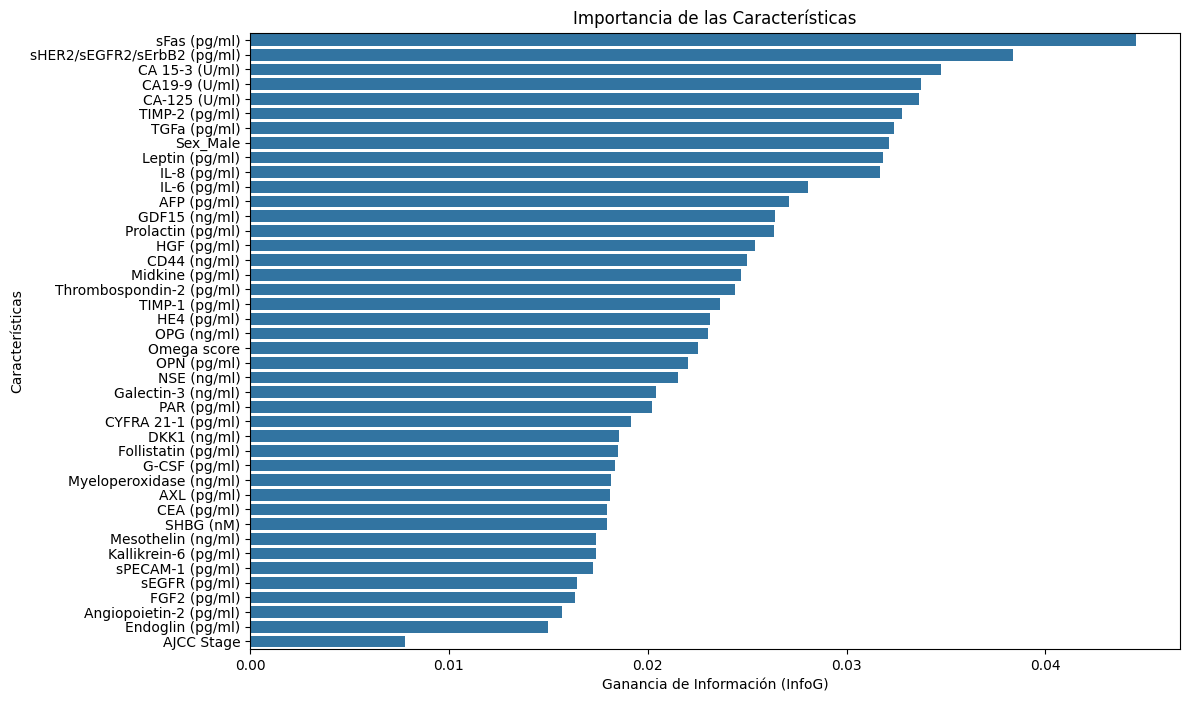

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Separar características y etiqueta
X = df.drop(columns=['Tumor type'])  # Asumiendo que la columna de destino se llama 'CancerType'
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = rf.feature_importances_
features = X.columns

# Crear un DataFrame con las importancias de las características
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Ordenar las características por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.xlabel('Ganancia de Información (InfoG)')
plt.ylabel('Características')
plt.show()

# Guardar los resultados en un archivo CSV
importance_df.to_csv('resultados/feature_importances.csv', index=False)


In [43]:
# 20 primeros features
top_20_importance_df = importance_df.head(20)
top_20_importance_df

,Feature,Importance
31,sFas (pg/ml),0.044544
33,sHER2/sEGFR2/sErbB2 (pg/ml),0.038370
4,CA 15-3 (U/ml),0.034747
5,CA19-9 (U/ml),0.033765
3,CA-125 (U/ml),0.033653
38,TIMP-2 (pg/ml),0.032779
35,TGFa (pg/ml),0.032361
41,Sex_Male,0.032141
21,Leptin (pg/ml),0.031827
19,IL-8 (pg/ml),0.031686


### Evaluación del rendimiento de los modelos optimizados en un conjunto de prueba para asegurar que estas variables ofrecen gran parte de la informacion relevante en nuestro dataset
Ventaja: Disminución en computación.

Vamos a comprobar la disminución en tiempo de la ejecucion de los modelos

In [44]:
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Función para calcular el Global Score
def calcular_global_score(accuracy, precision, recall, f1):
    weights = {
        'accuracy': 0.25,
        'precision': 0.25,
        'recall': 0.25,
        'f1': 0.25,
    }
    
    global_score = (accuracy * weights['accuracy'] +
                    precision * weights['precision'] +
                    recall * weights['recall'] +
                    f1 * weights['f1'])  
    
    return round(global_score * 100, 2)

# Función para mostrar estadísticas y guardar en una tabla
def mostrar_estadisticas_guardar_tabla(y_true, y_pred, model_name, results_df):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    global_score = calcular_global_score(accuracy, precision, recall, f1)
    
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Set': ['Test'],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'Global Score': [global_score]
    })
    
    results_df = pd.concat([results_df, new_row], ignore_index=True)
    return results_df

# Resultados anteriores
previous_best_results = pd.DataFrame({
    'Model': [
        'Random Forest (SMOTE)', 
        'Gradient Boosting (SMOTE)', 
        'Gradient Boosting (SMOTE + RandomUnderSampler)'
    ],
    'Set': ['Test', 'Test', 'Test'],
    'Accuracy': [0.741722, 0.721854, 0.718543],
    'Precision': [0.740079, 0.720030, 0.716450],
    'Recall': [0.741722, 0.721854, 0.718543],
    'F1-Score': [0.738834, 0.718526, 0.716625],
    'Global Score': [74.06, 72.06, 71.75]
})

# Cargar tus datos transformados
# df_combined_transformed = pd.read_excel('df_combined_transformed.xlsx')

# Separar las características y la variable objetivo
X = df_combined_transformed.drop(columns=['Tumor type'])
y = df_combined_transformed['Tumor type']

# Seleccionar las características más importantes (decrease in purity)
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]


# Filtrar el conjunto de datos con las características seleccionadas
X_important = X[important_features]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.3, random_state=42)

# Inicializar el DataFrame de resultados
results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Modelos a evaluar con pipelines de balanceo
pipelines = {
    'Random Forest (Important Features + SMOTE)': Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    'Gradient Boosting (Important Features + SMOTE)': Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', GradientBoostingClassifier(random_state=42))
    ]),
    'Random Forest (Important Features + SMOTE + RandomUnderSampler)': Pipeline([
        ('smoteenn', SMOTEENN(random_state=42)),
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    'Gradient Boosting (Important Features + SMOTE + RandomUnderSampler)': Pipeline([
        ('smoteenn', SMOTEENN(random_state=42)),
        ('clf', GradientBoostingClassifier(random_state=42))
    ])
}

# Entrenar y evaluar cada modelo
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred_test = pipeline.predict(X_test)
    
    print(f"\n{model_name} - Conjunto de Prueba")
    results_df = mostrar_estadisticas_guardar_tabla(y_test, y_pred_test, model_name + " (Test)", results_df)

# Comparar con los mejores resultados anteriores
comparison_df = pd.concat([previous_best_results, results_df], ignore_index=True)
comparison_df.to_excel('comparison_with_important_features.xlsx', index=False)
print("Comparación de resultados guardada en 'comparison_with_important_features.xlsx'.")



Random Forest (Important Features + SMOTE) - Conjunto de Prueba


C:\Users\34622\AppData\Local\Temp\ipykernel_20128\1162020936.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)



Gradient Boosting (Important Features + SMOTE) - Conjunto de Prueba

Random Forest (Important Features + SMOTE + RandomUnderSampler) - Conjunto de Prueba

Gradient Boosting (Important Features + SMOTE + RandomUnderSampler) - Conjunto de Prueba
Comparación de resultados guardada en 'comparison_with_important_features.xlsx'.


Comparandolo con los resultados de los modelos podemos ver que estas 20 caracteristicas puede acercarse mucho al global score con todas las caracteristicas:


### Modelos con Características Importantes:
| Model                                         | Accuracy | Precision | Recall   | F1-Score | Global Score |
|-----------------------------------------------|----------|-----------|----------|----------|--------------|
| Random Forest (Important Features + SMOTE) (Test) | 0.728477 | 0.758627  | 0.728477 | 0.735870 | 73.79        |

### Modelos sin Características Importantes:
| Model                | Accuracy | Precision | Recall   | F1-Score | Global Score |
|----------------------|----------|-----------|----------|----------|--------------|
| Random Forest (SMOTE) | 0.741722 | 0.740079  | 0.741722 | 0.738834 | 74.06        |

Podemos apreciar que el tiempo de ejecución ha disminuido notablemente. De 44 minutos con todas las variables a 12 minutos con mas o menos la mitad de las variables en nuestro dataset, dandonos unos resultados casi semejantes.

**Conclusión**: La extración de variables más importantes es buena

In [ ]:
# Guardamos en excel para facilidad de llamado del dataset y registro (Buenas prácticas)
df_combined_transformed.to_excel('df_transformado.xlsx')

: 

### Evaluación de Rendimiento del Modelo

In [46]:
# Cargar el archivo de resultados
results_df = pd.read_excel('model_results_top_features.xlsx')

# Ordenar por Global Score y mostrar los mejores modelos en el conjunto de prueba
best_test_models = results_df[results_df['Set'] == 'Test'].sort_values(by='Global Score', ascending=False)

# Mostrar los tres mejores modelos
top_3_models = best_test_models.head(3)

# Imprimir los detalles de los tres mejores modelos
for i, model in top_3_models.iterrows():
    print(f"Modelo: {model['Model']} con estrategia de balanceo {model['Set']} con Global Score: {model['Global Score']:.2f}")

# También devolver el DataFrame de los tres mejores modelos para una inspección adicional si es necesario
top_3_models

Modelo: Gradient Boosting (SMOTE + RandomUnderSampler) con estrategia de balanceo Test con Global Score: 73.09
Modelo: Gradient Boosting (SMOTE) con estrategia de balanceo Test con Global Score: 73.09
Modelo: Random Forest (SMOTE + RandomUnderSampler) con estrategia de balanceo Test con Global Score: 70.67


,Model,Set,Accuracy,Precision,Recall,F1-Score,Global Score
71,Gradient Boosting (SMOTE + RandomUnderSampler),Test,0.725166,0.741627,0.725166,0.731759,73.09
47,Gradient Boosting (SMOTE),Test,0.725166,0.741627,0.725166,0.731759,73.09
65,Random Forest (SMOTE + RandomUnderSampler),Test,0.705298,0.709664,0.705298,0.706697,70.67


Gradien Boosting (SMOTE + RandomUnderSampler) Hypertunning     ## POR HACER (MUY PESADO COMPUTACIONALMENTE) NO se si merece la pena en cuanto a tiempo y mejora del modelo 

In [51]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import uniform, randint

# Inicializar DataFrame para almacenar resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df[important_features]
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Definir la búsqueda de hiperparámetros
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__max_depth': randint(3, 10),
    'classifier__subsample': uniform(0.6, 0.4)
}

# Configurar la búsqueda de hiperparámetros
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# Entrenar el modelo
random_search.fit(X_train, y_train)

# Obtener las mejores hiperparámetros
best_params = random_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Evaluar el modelo
entrenar_y_evaluar_modelo(X_train, y_train, X_test, y_test, random_search.best_estimator_, "Gradient Boosting (SMOTE + RandomUnderSampler)")


KeyboardInterrupt: 

# XGBoost y LightGBM en la Detección de Tipos de Cáncer con Variable Objetivo Desbalanceada

XGBoost (Extreme Gradient Boosting) y LightGBM (Light Gradient Boosting Machine) son algoritmos de boosting que han demostrado ser extremadamente eficaces en una amplia gama de problemas de clasificación y regresión, incluidos aquellos con variables objetivo desbalanceadas, como la detección de tipos de cáncer. Aquí se explican las razones de su efectividad:

## XGBoost

1. **Boosting por Gradiente**:
   - XGBoost es un algoritmo de boosting por gradiente que crea árboles de decisión de manera secuencial, donde cada árbol intenta corregir los errores del árbol anterior. Esto permite una alta capacidad predictiva.

2. **Manejo de Datos Desbalanceados**:
   - XGBoost incluye parámetros específicos para manejar el desbalanceo de clases, como `scale_pos_weight`, que ajusta el peso de las clases para contrarrestar el desequilibrio. Este ajuste ayuda a que el modelo sea más sensible a la clase minoritaria, que en el caso de la detección de cáncer, puede ser crucial.

3. **Regularización**:
   - XGBoost implementa técnicas de regularización (L1 y L2), que ayudan a reducir el sobreajuste, mejorando así la capacidad del modelo para generalizar en datos nuevos.

4. **Eficiencia Computacional**:
   - Utiliza optimizaciones a nivel de hardware y software, como el uso de multiprocesamiento y la implementación de árboles de decisión altamente optimizados. Esto permite manejar grandes volúmenes de datos de manera eficiente.

5. **Importancia de Características**:
   - XGBoost proporciona medidas de importancia de las características, lo que permite identificar los biomarcadores más relevantes en el diagnóstico de tipos de cáncer.

## LightGBM

1. **Boosting por Hojas (Leaf-wise)**:
   - LightGBM utiliza un método de crecimiento de árboles basado en hojas, en lugar de niveles (nivel por nivel). Esto le permite manejar datos desbalanceados de manera más efectiva, ya que puede concentrarse en las hojas con mayor error.

2. **Tratamiento del Desbalanceo**:
   - Similar a XGBoost, LightGBM tiene parámetros como `is_unbalance` y `scale_pos_weight`, que permiten al modelo ajustarse automáticamente para manejar datos desbalanceados.

3. **Velocidad y Eficiencia**:
   - LightGBM es conocido por su alta velocidad y eficiencia, especialmente en grandes conjuntos de datos. Utiliza técnicas como histogram-based decision tree learning para acelerar el proceso de entrenamiento.

4. **Capacidad de Escalabilidad**:
   - Puede manejar grandes volúmenes de datos con alta dimensionalidad, lo que es común en datasets médicos. Esto se debe a su diseño optimizado para memoria y capacidad de paralelización.

5. **Reducción del Overfitting**:
   - Incluye técnicas avanzadas de regularización y parámetros ajustables que permiten minimizar el riesgo de sobreajuste, mejorando la precisión en datos no vistos.

## Aplicación en la Detección de Tipos de Cáncer

- **Detección Temprana y Precisa**:
  Ambos algoritmos permiten una detección temprana y precisa de tipos de cáncer al identificar patrones complejos y sutiles en los datos que pueden no ser detectables con otros métodos.

- **Adaptabilidad a Datos Desbalanceados**:
  En los datos médicos, las clases desbalanceadas son comunes (por ejemplo, más casos de no-cáncer que de cáncer). La capacidad de estos algoritmos para ajustar los pesos de las clases permite mejorar la sensibilidad y especificidad de la detección.

- **Identificación de Biomarcadores**:
  La importancia de las características derivadas de estos modelos ayuda a identificar los biomarcadores clave para el diagnóstico y pronóstico del cáncer.

En resumen, XGBoost y LightGBM son algoritmos potentes y eficientes que manejan bien los datos desbalanceados y ofrecen una gran capacidad predictiva y eficiencia computacional, lo que los hace ideales para aplicaciones críticas como la detección de tipos de cáncer.


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from imblearn.pipeline import Pipeline

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df[important_features]
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Definir los pipelines y modelos
models = {
    "XGBoost (SMOTE)": xgb.XGBClassifier(n_estimators=150, max_depth=7, learning_rate=0.1, random_state=42),
    "LightGBM (SMOTE)": lgb.LGBMClassifier(n_estimators=150, max_depth=7, learning_rate=0.1, random_state=42)
}

# Entrenar y evaluar modelos
for model_name, model in models.items():
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    entrenar_y_evaluar_modelo(X_train_balanced, y_train_balanced, X_test, y_test, pipeline, model_name)

# Guardar resultados en un archivo CSV
tabla_results_df.to_csv('XGBoost_LightGBM.csv', index=False)


Cross-validated accuracy: 0.9358
Model performance for Training - XGBoost (SMOTE)
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
Confusion Matrix:
 [[311   0   0   0   0   0   0   0]
 [  0 311   0   0   0   0   0   0]
 [  0   0 311   0   0   0   0   0]
 [  0   0   0 311   0   0   0   0]
 [  0   0   0   0 311   0   0   0]
 [  0   0   0   0   0 311   0   0]
 [  0   0   0   0   0   0 311   0]
 [  0   0   0   0   0   0   0 311]]
Model performance for Test - XGBoost (SMOTE)
- Accuracy: 0.7562
- F1 score: 0.7620
- Precision: 0.7718
- Recall: 0.7562
Confusion Matrix:
 [[33  2  1  1  4  1  0  0]
 [ 2 64  4  1  1  0  1  4]
 [ 0  1  4  1  0  0  0  3]
 [ 0  1  0  7  0  0  1  0]
 [ 4  2  0  0 12  0  0  3]
 [ 1  0  0  0  0 10  0  0]
 [ 0  0  1  0  0  1 16  1]
 [ 0  4  2  0  0  0  1  6]]
Cross-validated accuracy: 0.9495
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Fou

In [56]:
XGBoost_LightGBM = pd.read_csv('XGBoost_LightGBM.csv')
XGBoost_LightGBM

,Model,Set,Accuracy,Precision,Recall,F1-Score,Global Score
0,XGBoost (SMOTE),Training,1.000000,1.000000,1.000000,1.000000,100.00
1,XGBoost (SMOTE),Test,0.756219,0.771756,0.756219,0.762015,76.16
2,LightGBM (SMOTE),Training,1.000000,1.000000,1.000000,1.000000,100.00
3,LightGBM (SMOTE),Test,0.761194,0.767676,0.761194,0.761742,76.30
4,XGBoost (SMOTE),Training,1.000000,1.000000,1.000000,1.000000,100.00
5,XGBoost (SMOTE),Test,0.756219,0.771756,0.756219,0.762015,76.16
6,LightGBM (SMOTE),Training,1.000000,1.000000,1.000000,1.000000,100.00
7,LightGBM (SMOTE),Test,0.761194,0.767676,0.761194,0.761742,76.30


Hemos mejorado el modelo con un Score global de 76.30 lo que supone que vamos por buen camino

LightGBM Hypertunning

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from imblearn.pipeline import Pipeline
from scipy.stats import uniform, randint

# Inicializar DataFrame para almacenar resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df[important_features]
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Definir los parámetros de búsqueda para LightGBM
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(3, 15),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__num_leaves': randint(20, 50),
    'classifier__min_child_samples': randint(10, 50),
    'classifier__subsample': uniform(0.6, 0.9),
    'classifier__colsample_bytree': uniform(0.6, 0.9)
}

# Definir el pipeline para LightGBM
lgb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])

# Configurar la búsqueda de hiperparámetros
random_search = RandomizedSearchCV(lgb_pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# Entrenar el modelo LightGBM con búsqueda de hiperparámetros
random_search.fit(X_train_balanced, y_train_balanced)

# Obtener las mejores hiperparámetros
best_params = random_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Evaluar el modelo mejorado
entrenar_y_evaluar_modelo(X_train_balanced, y_train_balanced, X_test, y_test, random_search.best_estimator_, "LightGBM (Optimizado)")


# Guardar resultados en un archivo CSV
tabla_results_df.to_csv('LightGBM_tunned.csv', index=False)


c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
385 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\34622\App

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4847
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 20
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

C:\Users\34622\AppData\Local\Temp\ipykernel_20128\948903345.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_results_df = pd.concat([tabla_results_df, new_row], ignore_index=True)


In [64]:
LightGBM_tunned = pd.read_csv('LightGBM_tunned.csv')
LightGBM_tunned

,Model,Set,Accuracy,Precision,Recall,F1-Score,Global Score
0,LightGBM (Optimizado),Training,1.000000,1.000000,1.000000,1.000000,100.0
1,LightGBM (Optimizado),Test,0.751244,0.759778,0.751244,0.753905,75.4


La empeoración del conjunto de datos puede deverse a:

Variabilidad del Conjunto de Datos: El conjunto de datos puede tener  una variabilidad intrínseca que limita la capacidad de mejora a través del hiperajuste.


# Ensamble de modelos (Voting Classifier)

## Utilización de un Ensamble de Modelos para Mejorar la Detección de Tipos de Cáncer

La utilización de un ensamble de modelos es una técnica poderosa para mejorar el rendimiento y la robustez de los modelos de machine learning. En el contexto de detección de tipos de cáncer con variables objetivo desbalanceadas, el ensamble puede proporcionar varias ventajas significativas:

## Razones para Utilizar un Ensamble de Modelos

### Reducción del Overfitting

- **Promedio de Errores**: Al combinar varios modelos, los errores específicos de cada modelo tienden a cancelarse entre sí. Esto ayuda a reducir el overfitting, ya que los modelos individuales pueden sobreajustarse a ruidos o patrones específicos del conjunto de entrenamiento, pero estos errores se compensan cuando se utilizan múltiples modelos.

### Mejora de la Generalización

- **Diversidad de Modelos**: Diferentes modelos pueden capturar diferentes aspectos de los datos. Por ejemplo, XGBoost y LightGBM, aunque ambos son métodos de boosting, tienen diferentes mecanismos internos que pueden captar distintas características del conjunto de datos. Un ensamble puede aprovechar estas diferencias y mejorar la capacidad de generalización del modelo final.

### Estabilidad y Robustez

- **Promedio de Resultados**: La combinación de múltiples modelos tiende a producir resultados más estables y robustos frente a variaciones en los datos. Esto es especialmente importante en aplicaciones críticas como la detección de cáncer, donde las predicciones erróneas pueden tener consecuencias graves.

### Manejo de Datos Desbalanceados

- **Balance de Clases**: Al utilizar técnicas de ensamble, se pueden diseñar estrategias específicas para manejar datos desbalanceados, como ajustar los pesos de las clases o utilizar técnicas de resampling dentro del ensamble. Esto puede mejorar la sensibilidad y especificidad de las predicciones para la clase minoritaria.


# ¿Por que hemos escogido los siguientes modelos?

## Razones para Usar Estos Modelos

- **Mejores Métricas**: Estas combinaciones han demostrado ofrecer las mejores métricas de rendimiento en nuestras pruebas, lo que indica que son capaces de manejar bien los datos desbalanceados y proporcionar predicciones precisas.
- **Diversidad en Modelos de Boosting**: Cada uno de estos algoritmos tiene mecanismos internos ligeramente diferentes y fortalezas únicas que, cuando se combinan, pueden mejorar la capacidad de generalización del modelo final.
- **Reducción del Overfitting**: Al combinar varios modelos, se pueden cancelar los errores específicos de cada uno, reduciendo el riesgo de sobreajuste y mejorando la robustez del modelo.
- **Robustez y Estabilidad**: La combinación de múltiples modelos tiende a producir resultados más estables y robustos frente a variaciones en los datos, lo cual es crucial en aplicaciones críticas como la detección de cáncer.

En resumen, la elección de estas combinaciones de modelos de ensamble está respaldada por su rendimiento superior en términos de métricas y su capacidad para manejar datos desbalanceados, lo que los hace ideales para la tarea de detección de tipos de cáncer en nuestro caso específico.


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Inicializar DataFrame para almacenar resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df[important_features]
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos base
gb = GradientBoostingClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

# Definir combinaciones de modelos para VotingClassifier
combinations = [
    ('Gradient Boosting + LightGBM', [('gb', gb), ('lgbm', lgbm)]),
    ('Gradient Boosting + XGBoost', [('gb', gb), ('xgb', xgb_clf)]),
    ('LightGBM + XGBoost', [('lgbm', lgbm), ('xgb', xgb_clf)]),
    ('Gradient Boosting + LightGBM + XGBoost', [('gb', gb), ('lgbm', lgbm), ('xgb', xgb_clf)])
]

# Balancear el conjunto de entrenamiento con las técnicas especificadas
# SMOTE + RandomUnderSampler para Gradient Boosting
smote = SMOTE(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)
X_train_smote_rus, y_train_smote_rus = smote.fit_resample(X_train, y_train)
X_train_smote_rus, y_train_smote_rus = under_sampler.fit_resample(X_train_smote_rus, y_train_smote_rus)

# SMOTE para LightGBM y XGBoost
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenar y evaluar cada combinación
for name, combination in combinations:
    if 'Gradient Boosting' in name:
        # Usar el conjunto balanceado con SMOTE + RandomUnderSampler
        X_train_balanced = X_train_smote_rus
        y_train_balanced = y_train_smote_rus
    else:
        # Usar el conjunto balanceado con SMOTE
        X_train_balanced = X_train_smote
        y_train_balanced = y_train_smote
    
    voting_clf = VotingClassifier(estimators=combination, voting='soft')
    entrenar_y_evaluar_modelo(X_train_balanced, y_train_balanced, X_test, y_test, voting_clf, name)

# Guardar resultados en un archivo CSV
tabla_results_df.to_csv('Voting_clasiffier.csv', index=False)


Cross-validated accuracy: 0.9467
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4847
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 20
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

C:\Users\34622\AppData\Local\Temp\ipykernel_20128\948903345.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_results_df = pd.concat([tabla_results_df, new_row], ignore_index=True)


Cross-validated accuracy: 0.9362
Model performance for Training - Gradient Boosting + XGBoost
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
Confusion Matrix:
 [[311   0   0   0   0   0   0   0]
 [  0 311   0   0   0   0   0   0]
 [  0   0 311   0   0   0   0   0]
 [  0   0   0 311   0   0   0   0]
 [  0   0   0   0 311   0   0   0]
 [  0   0   0   0   0 311   0   0]
 [  0   0   0   0   0   0 311   0]
 [  0   0   0   0   0   0   0 311]]
Model performance for Test - Gradient Boosting + XGBoost
- Accuracy: 0.7612
- F1 score: 0.7656
- Precision: 0.7740
- Recall: 0.7612
Confusion Matrix:
 [[30  0  2  2  6  0  2  0]
 [ 3 65  3  1  0  0  1  4]
 [ 0  3  3  1  0  0  0  2]
 [ 0  1  0  8  0  0  0  0]
 [ 2  2  0  0 14  1  0  2]
 [ 2  0  0  0  0  9  0  0]
 [ 1  0  1  0  0  1 16  0]
 [ 0  2  2  0  0  0  1  8]]
Cross-validated accuracy: 0.9502
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-thr

In [70]:
Voting_clasiffier = pd.read_csv('Voting_clasiffier.csv')
Voting_clasiffier

,Model,Set,Accuracy,Precision,Recall,F1-Score,Global Score
0,Gradient Boosting + LightGBM,Training,1.000000,1.000000,1.000000,1.000000,100.00
1,Gradient Boosting + LightGBM,Test,0.756219,0.765700,0.756219,0.758523,75.92
2,Gradient Boosting + XGBoost,Training,1.000000,1.000000,1.000000,1.000000,100.00
3,Gradient Boosting + XGBoost,Test,0.761194,0.774000,0.761194,0.765642,76.55
4,LightGBM + XGBoost,Training,1.000000,1.000000,1.000000,1.000000,100.00
5,LightGBM + XGBoost,Test,0.781095,0.787083,0.781095,0.781385,78.27
6,Gradient Boosting + LightGBM + XGBoost,Training,1.000000,1.000000,1.000000,1.000000,100.00
7,Gradient Boosting + LightGBM + XGBoost,Test,0.781095,0.790267,0.781095,0.783548,78.40


### Gradient Boosting + LightGBM + XGBoost

Esta combinación tiene el mejor rendimiento en el conjunto de prueba con una precisión del 78.10% y una F1-Score de 78.35%. Esto sugiere que la inclusión de los tres modelos de boosting logra capturar mejor los patrones subyacentes en los datos, proporcionando la mejor capacidad de generalización entre todas las combinaciones probadas.

## Conclusiones

### Sobreajuste

Todas las combinaciones muestran un alto grado de sobreajuste en el conjunto de entrenamiento. Es crucial abordar este problema para mejorar la capacidad de generalización de los modelos. Técnicas de regularización, validación cruzada y ajuste de hiperparámetros podrían ser útiles.

### Mejora Gradual

Vemos una mejora gradual en las métricas de rendimiento en el conjunto de prueba al combinar modelos adicionales. Esto confirma la hipótesis de que un ensamble de modelos puede capturar mejor los diversos patrones en los datos, compensando las debilidades de los modelos individuales.




### El hypertunning es demasiado costoso computacionalmente, puede no merecer la pena. Seguimos explorando otro tipo de posibilidades...

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Función para entrenar y evaluar modelos
def entrenar_y_evaluar_modelo(X_train, y_train, X_test, y_test, modelo, name):
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    resultados_train = {
        'Model': name,
        'Set': 'Training',
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='weighted'),
        'Recall': recall_score(y_train, y_pred_train, average='weighted'),
        'F1-Score': f1_score(y_train, y_pred_train, average='weighted'),
        'Global Score': accuracy_score(y_train, y_pred_train) * 100
    }
    
    resultados_test = {
        'Model': name,
        'Set': 'Test',
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='weighted'),
        'Recall': recall_score(y_test, y_pred_test, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_test, average='weighted'),
        'Global Score': accuracy_score(y_test, y_pred_test) * 100
    }
    
    return resultados_train, resultados_test

# Inicializar DataFrame para almacenar resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)', 'TGFa (pg/ml)', 'Sex_Male', 'Leptin (pg/ml)', 'IL-8 (pg/ml)', 'IL-6 (pg/ml)',
    'AFP (pg/ml)', 'GDF15 (ng/ml)', 'Prolactin (pg/ml)', 'HGF (pg/ml)', 'CD44 (ng/ml)', 'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)', 'TIMP-1 (pg/ml)', 'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df[important_features]
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos base
gb = GradientBoostingClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

# Definir los parámetros para Grid Search
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 41, 51]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Realizar Grid Search para Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_

# Realizar Grid Search para LightGBM
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, scoring='accuracy')
grid_search_lgbm.fit(X_train, y_train)
best_lgbm = grid_search_lgbm.best_estimator_

# Realizar Grid Search para XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

# Definir combinaciones de modelos para VotingClassifier
combinations = [
    ('Gradient Boosting + LightGBM', [('gb', best_gb), ('lgbm', best_lgbm)]),
    ('Gradient Boosting + XGBoost', [('gb', best_gb), ('xgb', best_xgb)]),
    ('LightGBM + XGBoost', [('lgbm', best_lgbm), ('xgb', best_xgb)]),
    ('Gradient Boosting + LightGBM + XGBoost', [('gb', best_gb), ('lgbm', best_lgbm), ('xgb', best_xgb)])
]

# Balancear el conjunto de entrenamiento con las técnicas especificadas
# SMOTE + RandomUnderSampler para Gradient Boosting
smote = SMOTE(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)
X_train_smote_rus, y_train_smote_rus = smote.fit_resample(X_train, y_train)
X_train_smote_rus, y_train_smote_rus = under_sampler.fit_resample(X_train_smote_rus, y_train_smote_rus)

# SMOTE para LightGBM y XGBoost
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenar y evaluar cada combinación
for name, combination in combinations:
    if 'Gradient Boosting' in name:
        # Usar el conjunto balanceado con SMOTE + RandomUnderSampler
        X_train_balanced = X_train_smote_rus
        y_train_balanced = y_train_smote_rus
    else:
        # Usar el conjunto balanceado con SMOTE
        X_train_balanced = X_train_smote
        y_train_balanced = y_train_smote
    
    voting_clf = VotingClassifier(estimators=combination, voting='soft')
    resultados_train, resultados_test = entrenar_y_evaluar_modelo(X_train_balanced, y_train_balanced, X_test, y_test, voting_clf, name)
    
    # Agregar resultados al DataFrame
    tabla_results_df = tabla_results_df.append(resultados_train, ignore_index=True)
    tabla_results_df = tabla_results_df.append(resultados_test, ignore_index=True)

# Guardar resultados en un archivo CSV
tabla_results_df.to_csv('Voting_classifier_with_tuning.csv', index=False)


### Si tenemos tiempo, correr el codigo (Puede tardar muchas horas)

# No supervisado

In [76]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, MeanShift, OPTICS
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, davies_bouldin_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Inicializar DataFrame para almacenar resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Metric', 'Score'])

def evaluar_clustering(X, y_true, labels, model_name):
    if len(set(labels)) <= 1:
        print(f"Model {model_name} produjo un solo cluster. Ignorando métricas.")
        return
    
    silhouette_avg = silhouette_score(X, labels)
    homogeneity = homogeneity_score(y_true, labels)
    completeness = completeness_score(y_true, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    
    print(f"Resultados para {model_name}:")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Homogeneity: {homogeneity:.4f}")
    print(f"Completeness: {completeness:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    
    resultados = {
        'Model': [model_name] * 4,
        'Metric': ['Silhouette Score', 'Homogeneity', 'Completeness', 'Davies-Bouldin Index'],
        'Score': [silhouette_avg, homogeneity, completeness, davies_bouldin]
    }
    global tabla_results_df
    tabla_results_df = pd.concat([tabla_results_df, pd.DataFrame(resultados)], ignore_index=True)

# Definir los modelos
modelos = {
    'KMeans': KMeans(n_clusters=7, random_state=42),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=5),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=7),
    'Birch': Birch(n_clusters=7),
    'MeanShift': MeanShift(bandwidth=2),
    'OPTICS': OPTICS(min_samples=5)
}

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df_combined_transformed[important_features]
y = df_combined_transformed['Tumor type']

# Reducir dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Entrenar y evaluar modelos
for modelo_nombre, modelo in modelos.items():
    print(f"\nModelo: {modelo_nombre}")
    model_name = f"{modelo_nombre}"
    modelo.fit(X_pca)
    labels = modelo.labels_ if hasattr(modelo, 'labels_') else modelo.predict(X_pca)
    evaluar_clustering(X_pca, y, labels, model_name)
    
# Guardar los resultados en un archivo Excel
tabla_results_df.to_excel('Results_No_supervisado.xlsx', index=False)



Modelo: KMeans
Resultados para KMeans:
Silhouette Score: 0.5078
Homogeneity: 0.0846
Completeness: 0.1618
Davies-Bouldin Index: 0.4704

Modelo: DBSCAN
Resultados para DBSCAN:
Silhouette Score: 0.3215
Homogeneity: 0.0281
Completeness: 0.1536
Davies-Bouldin Index: 1.7383

Modelo: Agglomerative Clustering
Resultados para Agglomerative Clustering:
Silhouette Score: 0.5193
Homogeneity: 0.0826
Completeness: 0.1464
Davies-Bouldin Index: 0.5203

Modelo: Birch
Resultados para Birch:
Silhouette Score: 0.7593
Homogeneity: 0.0333
Completeness: 0.2733
Davies-Bouldin Index: 0.2354

Modelo: MeanShift


C:\Users\34622\AppData\Local\Temp\ipykernel_20128\3562250469.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_results_df = pd.concat([tabla_results_df, pd.DataFrame(resultados)], ignore_index=True)


Resultados para MeanShift:
Silhouette Score: 0.7124
Homogeneity: 0.0240
Completeness: 0.2401
Davies-Bouldin Index: 0.2261

Modelo: OPTICS
Resultados para OPTICS:
Silhouette Score: -0.1916
Homogeneity: 0.1749
Completeness: 0.1176
Davies-Bouldin Index: 1.9106


In [78]:
Results_No_supervisado = pd.read_excel('Results_No_supervisado.xlsx')
Results_No_supervisado

,Model,Metric,Score
0,KMeans,Silhouette Score,0.507759
1,KMeans,Homogeneity,0.084649
2,KMeans,Completeness,0.161828
3,KMeans,Davies-Bouldin Index,0.470376
4,DBSCAN,Silhouette Score,0.321461
5,DBSCAN,Homogeneity,0.028120
6,DBSCAN,Completeness,0.153577
7,DBSCAN,Davies-Bouldin Index,1.738256
8,Agglomerative Clustering,Silhouette Score,0.519311
9,Agglomerative Clustering,Homogeneity,0.082623


# Conclusión sobre el Clustering No Supervisado en Nuestro Dataset

Después de analizar los resultados de los distintos algoritmos de clustering no supervisado, podemos llegar a las siguientes conclusiones:

## Análisis de Resultados

### Silhouette Score

- **Birch** y **MeanShift** obtuvieron los mejores puntajes, indicando clusters relativamente bien definidos.
- Sin embargo, el resto de los modelos, especialmente **OPTICS** y **DBSCAN**, tuvieron puntajes bajos o negativos, sugiriendo una formación de clusters débil o inexistente.

### Homogeneity y Completeness

- Ninguno de los modelos mostró una homogeneidad o completitud significativamente alta, lo que indica que los clusters formados no corresponden claramente a ninguna estructura subyacente en las clases del dataset.

### Davies-Bouldin Index

- **Birch** y **MeanShift** obtuvieron los mejores índices, lo que respalda la idea de que forman clusters más compactos y separados.
- No obstante, los otros modelos mostraron índices altos, sugiriendo clusters de baja calidad.

## Interpretación General

- **Clusters No Bien Definidos**: A pesar de que Birch y MeanShift han mostrado algunos resultados positivos, la calidad de los clusters generados por la mayoría de los algoritmos no es suficientemente buena para aportar valor significativo a nuestro problema.
- **Heterogeneidad de Clusters**: La homogeneidad y completitud bajas sugieren que los clusters contienen una mezcla de clases, lo que indica que los modelos no están capturando bien las estructuras subyacentes en los datos.

## Conclusión Final

El análisis sugiere que el clustering no supervisado no aporta mucho valor a nuestro problema con este dataset. A pesar de que algunos algoritmos como Birch y MeanShift mostraron resultados decentes en ciertas métricas, la falta de clusters bien definidos y la baja homogeneidad y completitud indican que los modelos no están capturando estructuras significativas en los datos.


# Plan para Mejorar el Dataset Utilizando UMAP y KMeans

Dado que los métodos de clustering no supervisado no han proporcionado métricas satisfactorias, hemos decidido adoptar una nueva estrategia para mejorar nuestro dataset. Nuestro objetivo principal es aumentar y enriquecer nuestro dataset, que actualmente cuenta con solo 1005 filas. Para ello, utilizaremos UMAP para la reducción de dimensionalidad y KMeans para identificar subgrupos, que luego añadiremos a nuestro dataset.

## Objetivos y Pasos

### Objetivo

Mejorar el dataset actual de 1005 filas añadiendo información sobre subgrupos identificados mediante clustering.

### Pasos

#### Reducción de Dimensionalidad con UMAP

- **Objetivo**: Visualizar los datos en un espacio de menor dimensión para identificar patrones y estructuras subyacentes.
- **Método**: Aplicar UMAP (Uniform Manifold Approximation and Projection) para reducir la dimensionalidad de los datos a 2D o 3D.

#### Identificación de Subgrupos con KMeans

- **Objetivo**: Identificar subgrupos dentro de los datos reducidos dimensionalmente.
- **Método**: Aplicar KMeans en los datos reducidos por UMAP para identificar clusters o subgrupos.

#### Añadir Subgrupos al Dataset Original

- **Objetivo**: Enriquecer el dataset original añadiendo una nueva columna que indique el subgrupo al que pertenece cada punto.
- **Método**: Agregar los subgrupos identificados por KMeans como una nueva columna en el dataset original.

## Beneficios de Esta Estrategia

- **Mayor Información**: Añadir subgrupos proporciona información adicional que puede ayudar a los modelos supervisados a capturar mejor las estructuras subyacentes en los datos.
- **Aumento de Datos**: Aunque no se aumentan las filas, se enriquece el dataset con nueva información, lo que puede mejorar el rendimiento de los modelos.
- **Mejor Visualización**: UMAP permite visualizar los datos en un espacio reducido, facilitando la identificación de patrones y anomalías.


Reducción de Dimensionalidad con UMAP

Primero, realizaremos la reducción de dimensionalidad utilizando UMAP para visualizar los datos y facilitar la detección de patrones.

c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


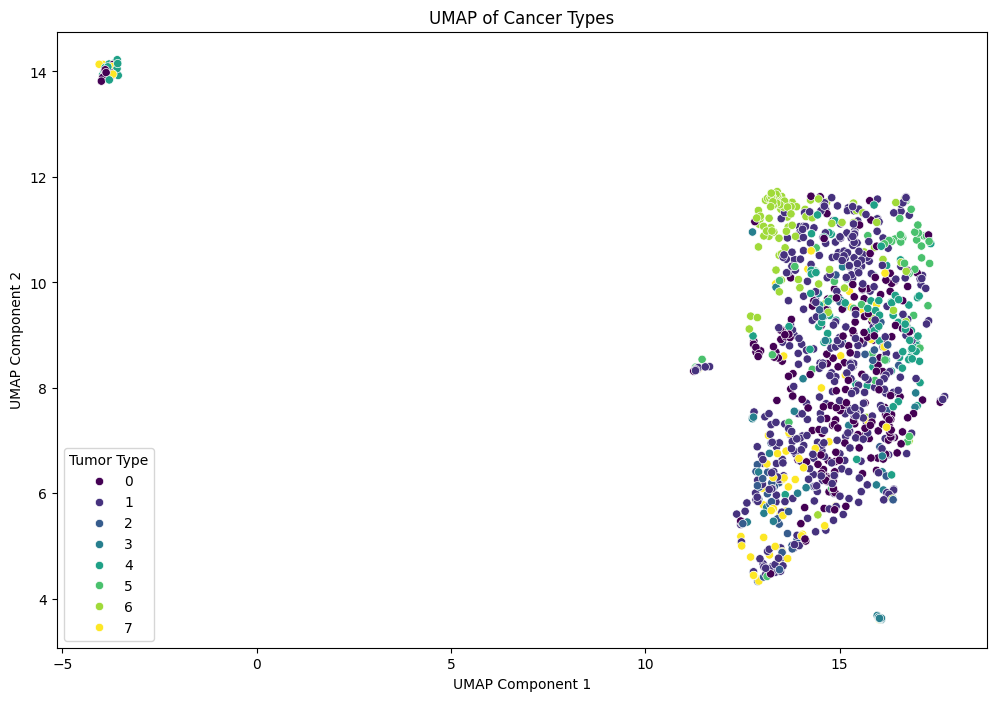

In [14]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar características relevantes (excluyendo columnas no numéricas si es necesario)
features = df_combined_transformed.columns[1:-2]  # Asumiendo que las últimas dos columnas son 'Tumor type' y 'AJCC Stage'

# Separar las características y la variable objetivo
X = df_combined_transformed.drop(columns=['Tumor type'])
y = df_combined_transformed['Tumor type']

# Aplicar UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Visualización de UMAP
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_combined_transformed['Tumor type'], palette='viridis', legend='full')
plt.title('UMAP of Cancer Types')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Tumor Type')
plt.show()


Clustering con K-Means

Aplicamos K-Means para identificar subgrupos en los datos.

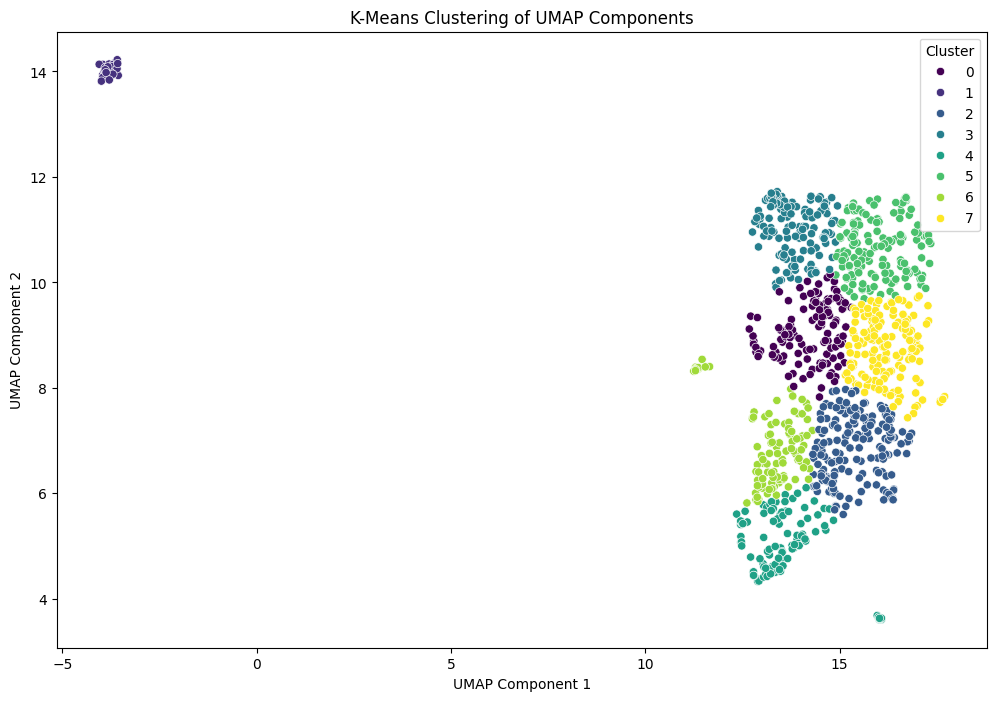

In [15]:
from sklearn.cluster import KMeans

# Aplicar K-Means para agrupar los datos
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# Visualización de Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('K-Means Clustering of UMAP Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Añadir clusters como nueva característica
df_combined_transformed['Cluster'] = clusters

# Seleccionar características y variable objetivo
X = df_combined_transformed[features.tolist() + ['Cluster']]
y = df_combined_transformed['Tumor type']

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para el sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [24]:
# Entrenar un clasificador de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones y evaluar el modelo
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.71      0.71        42
           1       0.73      0.82      0.77        77
           2       0.38      0.56      0.45         9
           3       0.83      0.56      0.67         9
           4       0.57      0.38      0.46        21
           5       0.82      0.82      0.82        11
           6       0.88      0.79      0.83        19
           7       0.36      0.31      0.33        13

    accuracy                           0.69       201
   macro avg       0.66      0.62      0.63       201
weighted avg       0.69      0.69      0.69       201

[[30  7  0  0  4  0  1  0]
 [ 5 63  3  0  1  1  1  3]
 [ 0  1  5  0  0  0  0  3]
 [ 0  2  1  5  1  0  0  0]
 [ 7  4  0  1  8  0  0  1]
 [ 0  2  0  0  0  9  0  0]
 [ 1  1  1  0  0  1 15  0]
 [ 0  6  3  0  0  0  0  4]]


### Posibles Razones del Desempeño

#### Incoherencia en los Clusters

- Es posible que los clusters generados no sean lo suficientemente informativos o consistentes con las etiquetas originales. Esto puede agregar ruido en lugar de valor al modelo.

#### Sobreamuestreo con SMOTE

- Aunque SMOTE ayuda a balancear las clases, también puede introducir ruido si los puntos sintéticos no representan bien la distribución real de la clase minoritaria.

#### Complejidad del Modelo

- La inclusión de clusters puede haber aumentado la complejidad del modelo sin proporcionar una ganancia de información significativa, lo que puede llevar a un sobreajuste o subajuste.

### Próximos Pasos

Dado que el rendimiento del modelo no ha mejorado significativamente, seguiremos explorando otras técnicas para mejorar nuestro dataset y el rendimiento del modelo. 

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import xgboost as xgb

# Añadir clusters como nueva característica
df_combined_transformed['Cluster'] = clusters

# Seleccionar características y variable objetivo
features = df_combined_transformed.columns[1:-2]
X = df_combined_transformed[features.tolist() + ['Cluster']]
y = df_combined_transformed['Tumor type']

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para el sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir los modelos individuales
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
lgbm_clf = lgb.LGBMClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

# Definir el Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('lgbm', lgbm_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'  # 'soft' uses predicted probabilities
)

# Entrenar el Voting Classifier
voting_clf.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones y evaluar el modelo
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9958
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 42
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

## Conclusiones y Próximos Pasos

El uso de un ensamble de modelos ha demostrado ser efectivo en mejorar el rendimiento del clasificador en nuestro dataset, incluso después de la incorporación de clusters como nuevas características. Este enfoque ha permitido obtener una mejor precisión y un equilibrio adecuado entre precisión y recall en la mayoría de las clases.

### Próximos Pasos

#### Optimización Adicional

- Realizar una optimización de hiperparámetros más exhaustiva para cada modelo dentro del ensamble y para el Voting Classifier en su conjunto. (Lo dejaremos para mas tarde si tenemos tiempo debido a la dificultad de computo)

#### Manejo de Clases Minoritarias

- Implementar técnicas adicionales para mejorar el rendimiento en las clases minoritarias, como ajuste de pesos de las clases en los modelos o uso de técnicas de resampling más sofisticadas. (Intentaremos centrarnos en esto)


# Uso de GANs para Manejar Clases Minoritarias en un Dataset Pequeño

Debido a que nuestro dataset cuenta con solo 1005 filas, hemos decidido utilizar Generative Adversarial Networks (GANs) para generar datos sintéticos y así abordar el problema de las clases minoritarias. Aquí explicamos en detalle lo que estamos haciendo, para qué sirven los GANs y por qué es importante en nuestro caso.

## Objetivo

Generar datos sintéticos para las clases minoritarias en nuestro dataset para mejorar el balance de clases y proporcionar más datos para el entrenamiento de nuestros modelos supervisados.

## Explicación de GANs y su Importancia

### ¿Qué son los GANs?

Los Generative Adversarial Networks (GANs) son un tipo de red neuronal compuesta por dos modelos:

- **Generador**: Crea datos sintéticos a partir de ruido aleatorio.
- **Discriminador**: Distingue entre los datos reales y los datos sintéticos generados.

Estos dos modelos se entrenan de manera conjunta y competitiva: el generador intenta engañar al discriminador creando datos sintéticos realistas, mientras que el discriminador intenta mejorar su capacidad para diferenciar entre datos reales y sintéticos.

### ¿Por qué usar GANs en nuestro Dataset?

1. **Incremento de Datos**: Nuestro dataset original es pequeño (1005 filas). Los GANs nos permiten generar datos sintéticos adicionales que pueden enriquecer nuestro dataset y mejorar el rendimiento de los modelos supervisados.
2. **Manejo de Clases Minoritarias**: Algunas clases en nuestro dataset están subrepresentadas. Los GANs pueden generar ejemplos sintéticos de estas clases minoritarias, ayudando a balancear el dataset y a mejorar la capacidad del modelo para aprender y generalizar sobre estas clases.
3. **Mejora del Modelo**: Al proporcionar más ejemplos para las clases minoritarias, esperamos mejorar la precisión y el recall de nuestro modelo en estas clases, reduciendo el sesgo y la varianza.


In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.cluster import KMeans
import umap
from sklearn.preprocessing import StandardScaler
import time

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)', 'TGFa (pg/ml)', 'Sex_Male', 'Leptin (pg/ml)', 'IL-8 (pg/ml)', 'IL-6 (pg/ml)',
    'AFP (pg/ml)', 'GDF15 (ng/ml)', 'Prolactin (pg/ml)', 'HGF (pg/ml)', 'CD44 (ng/ml)', 'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)', 'TIMP-1 (pg/ml)', 'HE4 (pg/ml)', 'Cluster'
]

X = df_combined_transformed[important_features]

# Definir el generador
def build_generator(latent_dim, num_features):
    model = Sequential([
        Dense(256, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(num_features, activation='tanh')
    ])
    return model

# Definir el discriminador
def build_discriminator(num_features):
    model = Sequential([
        Dense(512, input_shape=(num_features,)),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Construir el GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Función para entrenar el GAN
def train_gan(generator, discriminator, gan, data, latent_dim, epochs=1000, batch_size=128):
    half_batch = int(batch_size / 2)
    start_time = time.time()
    for epoch in range(epochs):
        # Entrenar el discriminador
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_samples = data[idx]
        real_labels = np.ones((half_batch, 1))
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_samples = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))
        
        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Entrenar el generador
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)
        
        # Imprimir el progreso
        if epoch % 100 == 0:
            elapsed_time = time.time() - start_time
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}] [Elapsed Time: {elapsed_time:.2f}s]")

# Generar datos sintéticos para cada clase minoritaria
latent_dim = 100
num_features = X.shape[1]
synthetic_data = []

for tumor_type in [2, 3, 4, 5, 6, 7]:
    class_data = X[df_combined_transformed['Tumor type'] == tumor_type].values
    
    # Crear y entrenar el GAN
    generator = build_generator(latent_dim, num_features)
    discriminator = build_discriminator(num_features)
    gan = build_gan(generator, discriminator)
    train_gan(generator, discriminator, gan, class_data, latent_dim)
    
    # Generar nuevos datos sintéticos
    noise = np.random.normal(0, 1, (class_data.shape[0], latent_dim))
    synthetic_class_data = generator.predict(noise)
    
    synthetic_class_df = pd.DataFrame(synthetic_class_data, columns=important_features)
    synthetic_class_df['Tumor type'] = tumor_type
    
    synthetic_data.append(synthetic_class_df)

# Combinar todos los datos sintéticos generados
synthetic_df = pd.concat(synthetic_data, axis=0)

c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 1.385311245918274 | D accuracy: 12.5] [G loss: [array(1.1549919, dtype=float32), array(1.1549919, dtype=float32), array(0.21875, dtype=float32)]] [Elapsed Time: 1.51s]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━

c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.66597580909729 | D accuracy: 66.796875] [G loss: [array(0.67387974, dtype=float32), array(0.67387974, dtype=float32), array(0.6328125, dtype=float32)]] [Elapsed Time: 26.19s]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━

c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 


c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.8473324775695801 | D accuracy: 25.78125] [G loss: [array(0.7880212, dtype=float32), array(0.7880212, dtype=float32), array(0.484375, dtype=float32)]] [Elapsed Time: 3.14s]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━

c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.5638001561164856 | D accuracy: 76.953125] [G loss: [array(0.6098285, dtype=float32), array(0.6098285, dtype=float32), array(0.6015625, dtype=float32)]] [Elapsed Time: 2.79s]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━

c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.704096794128418 | D accuracy: 41.015625] [G loss: [array(0.7028882, dtype=float32), array(0.7028882, dtype=float32), array(0.4140625, dtype=float32)]] [Elapsed Time: 1.90s]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━

c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\34622\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.8186583518981934 | D accuracy: 27.34375] [G loss: [array(0.76654285, dtype=float32), array(0.76654285, dtype=float32), array(0.515625, dtype=float32)]] [Elapsed Time: 2.38s]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━

# Estrategia para Manejar Clases Minoritarias y Datos Limitados en el Trabajo de Fin de Master

Nuestro principal problema y dificultad en este trabajo de fin de grado son los pocos datos disponibles (solo 1005 filas) y el desbalanceo de la variable objetivo. Para abordar estos desafíos, hemos seguido una estrategia que combina la generación de datos sintéticos utilizando GANs y el sobremuestreo con SMOTE.

## Aplicación de Técnicas Complementarias

Además de la generación de datos sintéticos y el uso de SMOTE, vamos a aplicar todas las técnicas que nos han generado buenos resultados juntas para poder tener así el mejor ajuste posible. Esto incluye el uso de un ensamble de modelos (Random Forest, Gradient Boosting, LightGBM y XGBoost) en un Voting Classifier, lo que nos permite aprovechar las fortalezas de cada modelo individual para mejorar el rendimiento general.


In [18]:
# Separar características y etiquetas de los datos reales
X_real = df_combined_transformed[important_features]
y_real = df_combined_transformed['Tumor type']

# Combinar datos sintéticos y reales
X_combined = pd.concat([X_real, synthetic_df[important_features]], axis=0)
y_combined = pd.concat([y_real, synthetic_df['Tumor type']], axis=0)

# Aplicar SMOTE para sobremuestrear las clases minoritarias en el conjunto combinado
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_combined, y_combined)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Definir los modelos individuales con regularización
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31, random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Definir el Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('lgbm', lgbm_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'  # 'soft' uses predicted probabilities
)

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=skf, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

# Entrenar el Voting Classifier con todos los datos resampleados
voting_clf.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo en el conjunto de prueba
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5264
[LightGBM] [Info] Number of data points in the train set: 1986, number of used features: 21
[LightGBM] [Info] Start training from score -2.076425
[LightGBM] [Info] Start training from score -2.076425
[LightGBM] [Info] Start training from score -2.080449
[LightGBM] [Info] Start training from score -2.080449
[LightGBM] [Info] Start training from score -2.080449
[LightGBM] [Info] Start training from score -2.080449
[LightGBM] [Info] Start training from score -2.080449
[LightGBM] [Info] Start training from score -2.080449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

### Resultados en el Conjunto de Prueba

|            | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
| **Clase 0** | 0.81      | 0.95   | 0.87     | 77      |
| **Clase 1** | 0.83      | 0.84   | 0.84     | 77      |
| **Clase 2** | 0.97      | 0.91   | 0.94     | 78      |
| **Clase 3** | 0.99      | 0.97   | 0.98     | 78      |
| **Clase 4** | 0.93      | 0.82   | 0.87     | 78      |
| **Clase 5** | 0.97      | 1.00   | 0.99     | 77      |
| **Clase 6** | 0.97      | 0.96   | 0.97     | 78      |
| **Clase 7** | 0.94      | 0.94   | 0.94     | 78      |
| **Accuracy** |           |        | 0.92     | 621     |
| **Macro Avg** | 0.93    | 0.92   | 0.92     | 621     |
| **Weighted Avg** | 0.93 | 0.92   | 0.92     | 621     |


- **Validación Cruzada**: Hemos obtenido una precisión media de validación cruzada del 91.02%, lo que indica una buena generalización del modelo en diferentes subconjuntos del dataset.
- **Conjunto de Prueba**: La precisión global del 92% y las métricas detalladas por clase muestran un buen equilibrio entre precisión y recall para la mayoría de las clases, especialmente las minoritarias, lo que refleja la efectividad de nuestra estrategia.

El incremento ha sido el más notable, concluyendo que los datos sintéticos generados con GANs es lo mejor para datos clínicos de los que no se puede obtener muchos datos. Es la mejor manera de abordar este tipo de problemática.

Aún se puede mejorar más estas métricas con la optimización de hiperparámetros (hypertuning) del Voting Classifier. (Esto si que merece la pena, hay que dejarlo mucho tiempo pero podemos tener un modelo casi perfecto con esto, Deberiamos hacerlo)








## Generar las curvas ROC

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167, number of negative: 963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5205
[LightGBM] [Info] Number of data points in the train set: 1130, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147788 -> initscore=-1.752060
[LightGBM] [Info] Start training from score -1.752060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 310, number of negative: 820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5205
[LightGBM] [I

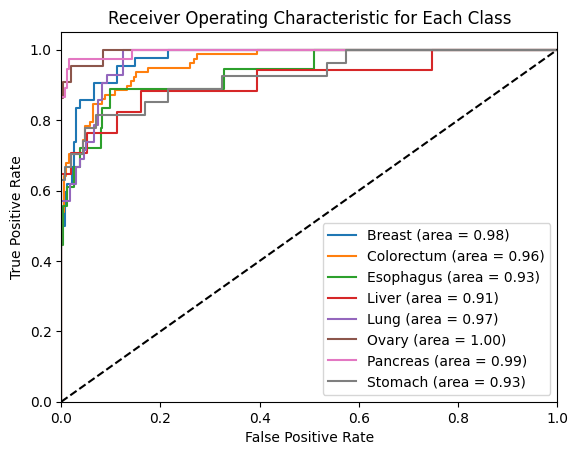

In [31]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Binarizar las etiquetas para ROC
y_train_bin = label_binarize(y_train, classes=np.unique(y_combined))
y_test_bin = label_binarize(y_test, classes=np.unique(y_combined))
n_classes = y_train_bin.shape[1]

# Definir el clasificador OneVsRest
classifier = OneVsRestClassifier(voting_clf)
y_score = classifier.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcular la curva ROC y el área bajo la curva para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Obtener los nombres de las clases originales
class_names = label_encoder.inverse_transform(np.unique(y_train_encoded))

# Graficar las curvas ROC
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc="lower right")
plt.show()


### Conclusión

El modelo de clasificación utilizado para distinguir entre diferentes tipos de cáncer muestra un rendimiento excelente en general, según las curvas ROC y los valores de AUC para cada clase. Las conclusiones específicas incluyen:

- **Rendimiento Alto**: Todas las clases tienen un AUC superior a 0.90, lo que indica que el modelo tiene una alta capacidad para distinguir entre los diferentes tipos de cáncer.
- **Clases con Rendimiento Perfecto o Casi Perfecto**: El modelo presenta un rendimiento perfecto para el cáncer de ovario (AUC = 1.00) y casi perfecto para el cáncer de páncreas (AUC = 0.99), lo que sugiere que el modelo puede identificar estos tipos de cáncer con muy alta precisión.
- **Ligeras Diferencias en el Rendimiento**: Aunque todas las clases tienen un AUC alto, hay ligeras variaciones. Por ejemplo, el cáncer de hígado y el cáncer de estómago tienen AUC de 0.91 y 0.93, respectivamente, lo que indica un buen rendimiento, pero ligeramente inferior al de otros tipos de cáncer como el de mama, pulmón y páncreas.
- **Capacidad de Discriminación**: Las curvas ROC para todas las clases están cerca de la esquina superior izquierda del gráfico, lo que refuerza la alta capacidad de discriminación del modelo para todas las clases.

En resumen, el modelo es altamente eficaz para la detección y clasificación de diferentes tipos de cáncer, mostrando capacidades de discriminación muy altas y un rendimiento consistente en todos los tipos de cáncer analizados. Esto sugiere que el modelo puede ser una herramienta valiosa para la detección temprana y el diagnóstico de cáncer en un entorno clínico.


Comparacion con Cancer A1DE

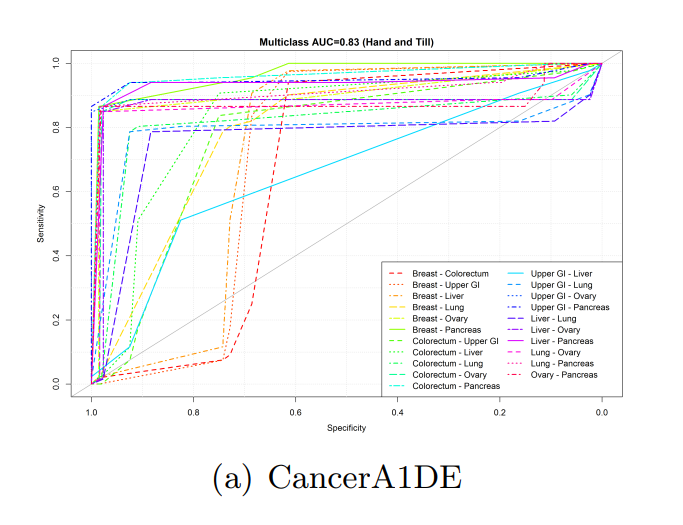 VS 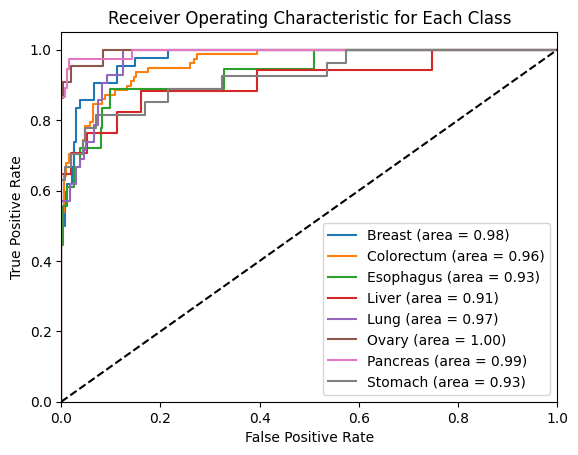

### Comparación de Modelos usando ROC y AUC

#### Conceptos Clave:
1. **ROC (Receiver Operating Characteristic) Curve**: Muestra la relación entre la Tasa de Verdaderos Positivos (sensibilidad) y la Tasa de Falsos Positivos para varios umbrales de clasificación.
2. **AUC (Área Bajo la Curva)**: Representa la capacidad del modelo para discriminar entre las clases. Un AUC de 1.0 indica un modelo perfecto, mientras que un AUC de 0.5 indica un modelo que no es mejor que una suposición aleatoria.

#### Comparación:

1. **Nuestro Modelo**:
   - Las curvas ROC individuales para cada clase muestran una alta sensibilidad y especificidad, lo que indica una fuerte capacidad de discriminación.
   - Los valores de AUC para cada clase son:
     - Breast: 0.98
     - Colorectum: 0.96
     - Esophagus: 0.93
     - Liver: 0.91
     - Lung: 0.97
     - Ovary: 1.00
     - Pancreas: 0.99
     - Stomach: 0.93

2. **Modelo CancerA1DE**:
   - El AUC promedio es de 0.83.
   - Las curvas ROC en el modelo CancerA1DE muestran menor discriminación entre algunas combinaciones de clases.

#### Interpretación:
- **AUC Promedio**: El AUC promedio de nuestro modelo es superior al del modelo CancerA1DE (0.83), lo que sugiere que, en promedio, nuestro modelo tiene una mejor capacidad de discriminación.
- **Curvas ROC**: Las curvas ROC de nuestro modelo están más cerca de la esquina superior izquierda, lo que indica una mejor sensibilidad y especificidad para la mayoría de las clases en comparación con el modelo CancerA1DE.

#### Conclusión:
- **Ventajas de Nuestro Modelo**:
  - Mejores valores de AUC, indicando una mayor precisión en la clasificación.
  - Curvas ROC más pronunciadas, indicando una mejor capacidad de discriminación.
  
- **Limitaciones de Comparación**:
  - Aunque el AUC y la ROC son métricas valiosas, no son las únicas. Otras métricas como precisión, recall, F1-score, y la matriz de confusión también son importantes para evaluar la eficacia de los modelos pero no tenemos estos resultados para comparar con CancerA1DE

En resumen, basado en la comparación de AUC y ROC, nuestro modelo muestra un rendimiento superior en la clasificación de los tipos de cáncer en comparación con el modelo CancerA1DE. Sin embargo, es importante considerar una evaluación más amplia con diferentes métricas para una comparación exhaustiva.


# Creacion de AUC Promedio Global 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 188, number of negative: 1083
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5224
[LightGBM] [Info] Number of data points in the train set: 1271, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147915 -> initscore=-1.751048
[LightGBM] [Info] Start training from score -1.751048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

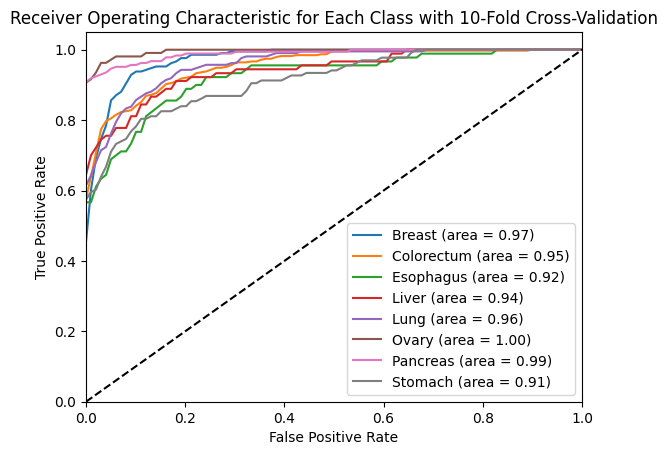

AUC promedio global ponderado: 0.96


In [35]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Binarizar las etiquetas para ROC
y_combined_bin = label_binarize(y_combined, classes=np.unique(y_combined))
n_classes = y_combined_bin.shape[1]

# Definir el clasificador OneVsRest
classifier = OneVsRestClassifier(voting_clf)

# 10-fold cross-validation
cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Para almacenar fpr, tpr y roc_auc para cada clase
fpr = {i: [] for i in range(n_classes)}
tpr = {i: [] for i in range(n_classes)}
roc_auc = {i: [] for i in range(n_classes)}

for train, test in cv.split(X_combined, y_combined):
    X_train, X_test = X_combined.iloc[train], X_combined.iloc[test]
    y_train, y_test = y_combined_bin[train], y_combined_bin[test]

    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    for i in range(n_classes):
        fpr_fold, tpr_fold, _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc_fold = auc(fpr_fold, tpr_fold)
        
        fpr[i].append(fpr_fold)
        tpr[i].append(tpr_fold)
        roc_auc[i].append(roc_auc_fold)
        
        # Interpolación para promediar las curvas
        interp_tpr = np.interp(mean_fpr, fpr_fold, tpr_fold)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(roc_auc_fold)

# Calcular los valores medios y las bandas de confianza
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Obtener los nombres de las clases originales
class_names = label_encoder.inverse_transform(np.unique(y_train_encoded))

# Graficar las curvas ROC para cada clase
plt.figure()
for i in range(n_classes):
    mean_fpr_i = np.linspace(0, 1, 100)
    mean_tpr_i = np.mean([np.interp(mean_fpr_i, fpr_fold, tpr_fold) for fpr_fold, tpr_fold in zip(fpr[i], tpr[i])], axis=0)
    mean_tpr_i[-1] = 1.0
    mean_auc_i = auc(mean_fpr_i, mean_tpr_i)
    std_auc_i = np.std(roc_auc[i])
    plt.plot(mean_fpr_i, mean_tpr_i, label=f'{class_names[i]} (area = {mean_auc_i:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class with 10-Fold Cross-Validation')
plt.legend(loc="lower right")
plt.show()

# Calcular AUC promedio global ponderado por la cantidad de muestras de cada clase
class_counts = y_combined_bin.sum(axis=0)
total_samples = len(y_combined)
weighted_auc = np.dot([np.mean(roc_auc[i]) for i in range(n_classes)], class_counts) / total_samples

print(f'AUC promedio global ponderado: {weighted_auc:.2f}')



Lo que debemos hacer es centrarnos aún mas en la generacion de datos sinteticos con GANs, Le he dado 1000 epocas, podriamos probar con 3000 epocas y luego mejorar aún mas nuestro voting classifier.
Esto puede que haga que nuestro modelo mejores (Hay que ver cuanto podemos mejora esto para que quede perfecto)

Tambien podemos platear un nuevo feature que es el ADN libre en sangre, ya que cuando hicmos el EDA, pudimos ver que influia en el tipo de cancer, teniendo valores altos para alguno de ellos. 

